# <u>Unit 5</u>: Hierarchical Clustering
## <u>Case Study</u>: Country Economy Classification

Each year the world bank determines four classifications of country economies based on GNI per capita and their own singular set of thresholds to separate these economies: low, lower-middle, upper-middle, and high. 

However, there are multiple factors that could be considered when creating broad categories of country economies and a more systematic, mathematical approach that takes into account multiple economic factors might be a better means of classifying national economies. The dataset that we will be exploring in this assignment is comprised of 9 numerical attributes for a set of 167 countries. Our research goal in this analysis is to discover and examine broad country economy classifications based on our analysis.

https://datahelpdesk.worldbank.org/knowledgebase/articles/378833-how-are-the-income-group-thresholds-determined
<hr>

### <u>Research Questions</u>

Specifically, in this analysis we would like to answer the following questions about the dataset.
* Do there exist clusters of countries in this dataset?
* If so, how many clusters are there?
* Are there some country clusters that are nested in larger country clusters?
* What factors characterize these country clusters that we discovered?



<hr>


## <u>Preprocessing</u>

### Basics

#### Most Data Science Projects will Use These Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#### Kmeans and silhoutte score Functions from Sklearn

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### TSNE Function from Sklearn

In [4]:
from sklearn.manifold import TSNE

#### Hierarchical Clustering Related Packages and Functions

In [5]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

#### Scaling Packages and Functions

In [5]:
from sklearn.preprocessing import StandardScaler

### Basic Examining of the Data

You can assume that this dataset has no missing values.

In [6]:
df = pd.read_csv('country_data.csv')
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [7]:
df.shape

(167, 10)

This dataset does not come with any pre-assigned class labels, but it does come with the country names, which we don't want to cluster. Let's create a new dataframe that has dropped the country labels.

In [8]:
X=df.copy().drop(['country'], axis=1)
X.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

### Should we scale the dataset?

Looking at some basic summary statistics for each of the numerical attributes below, we can see that the scale of some attributes (like income) is much larger than the scale of other attributes like total fertility. Because the euclidean distance is used (in some point) in the creation of the t-SNE plots and our hierarchical clustering algorithms that we will be using on this dataset, this suggests that the larger scale attributes will dominate our results.

So let's standardize the attributes first, before examining the clustering structure of the dataset and clustering the dataset.

In [9]:
X.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

X will be the scaled dataframe of just numerical variables that we designate for all algorithms. 

In [10]:
X_stand=StandardScaler().fit_transform(X)
X_stand

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [11]:
X=pd.DataFrame(X_stand, columns=X.columns)
X.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

df_stand will be our scaled dataframe that we will add other relevant variables to that we create in the rest of the analysis.

In [12]:
df_stand=X.copy()
df_stand['country']=df['country']
df_stand.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp              country  
0   1.902882 -0.679180          Afghanistan  
1  -0.859973 -0.485623              Albania  
2  -0.038404 -0.465376              Algeria  
3   2.128151 -0.516268               Angola  
4  -0.541946 -0.041817  Antigua and Barbuda

### Basic Descriptive Analytics of the Scaled Dataset

Can we determine anything about this scaled dataset before involving more sophisticated cluster analysis techniques?

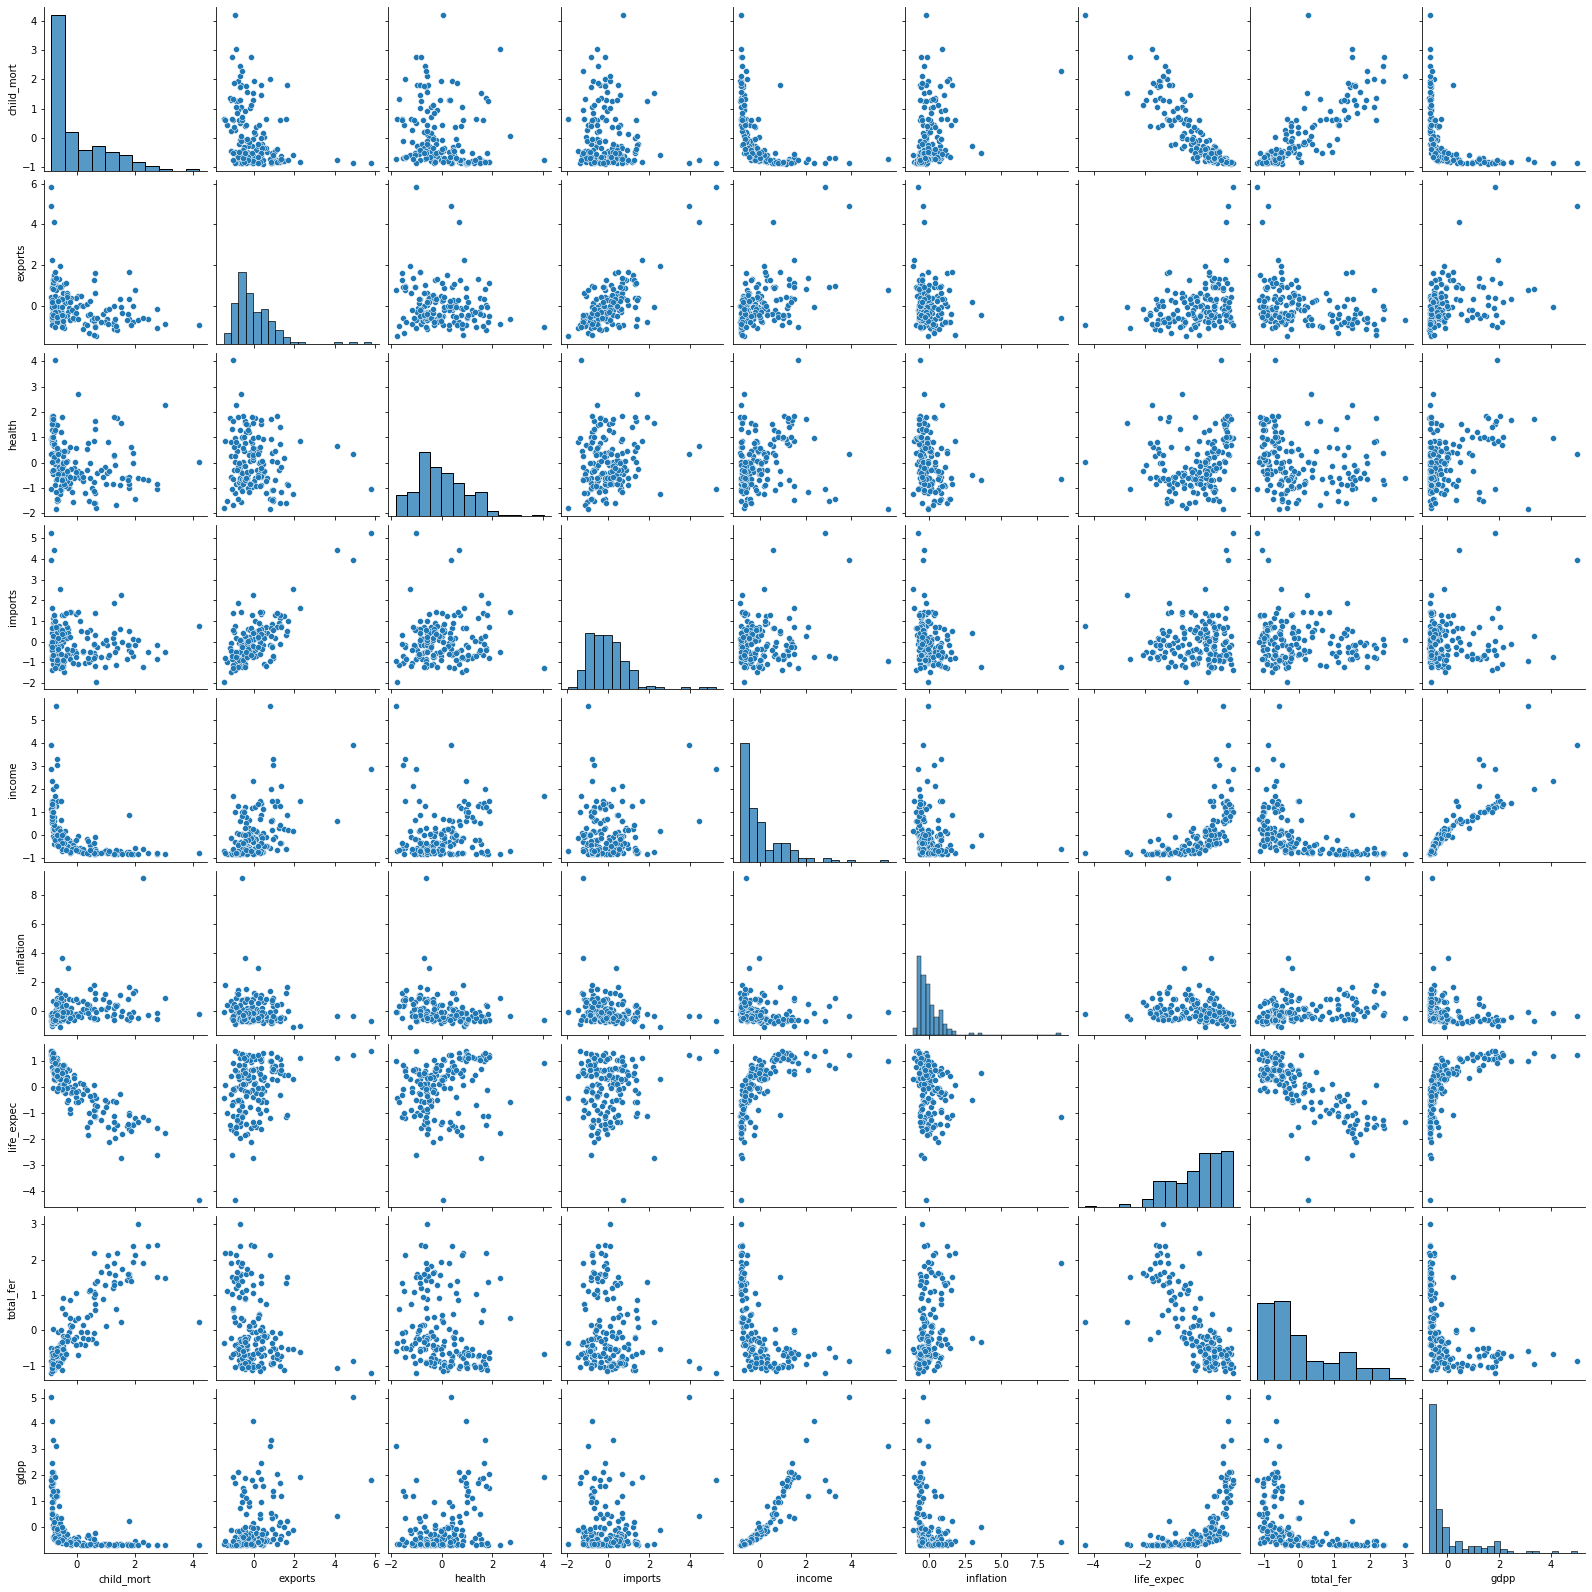

In [13]:
sns.pairplot(X)
plt.show()

It looks like this scaled dataset has some outliers. This may affect the ability of some clustering algorithm's ability to detect the underyling clustering structure such as:
* k-means
* hierarchical agglomerative clustering algorithms that use Ward's linkage, single linkage, and perhaps average linkage.

### Clusterability of Scaled Dataset and Cluster Properties

While it's good to consult with multiple methods for gauging clusterability in a complete analysis, we will just use t-SNE plots for this short lecture.

C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


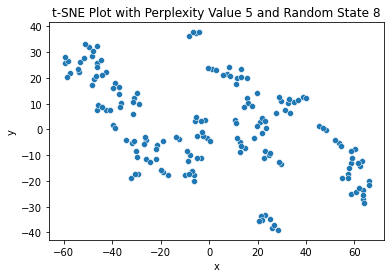

C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


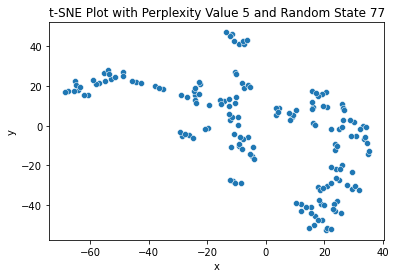

--------------------------------------------


C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


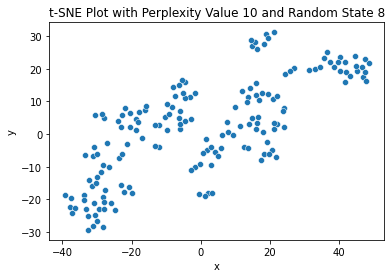

C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


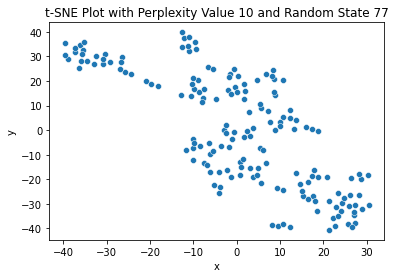

--------------------------------------------


C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


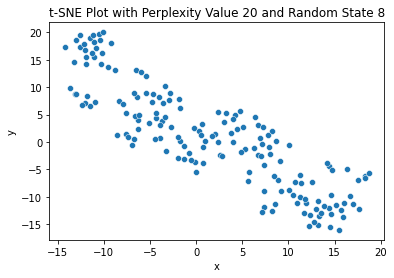

C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


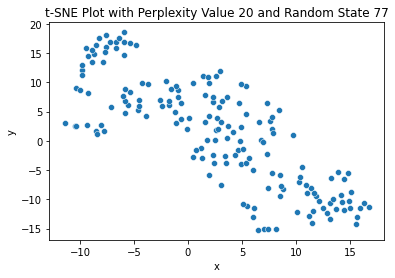

--------------------------------------------


C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


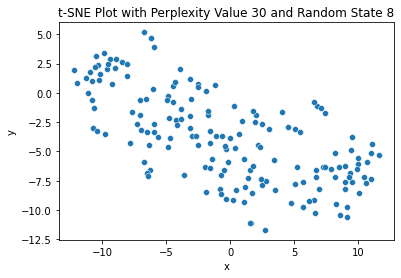

C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


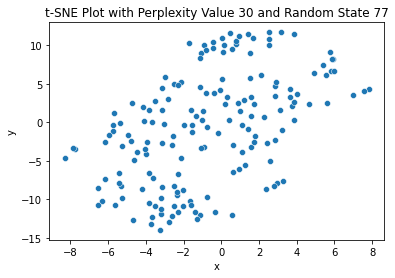

--------------------------------------------


C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


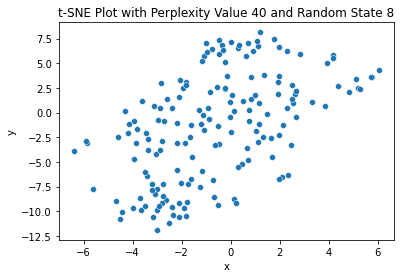

C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


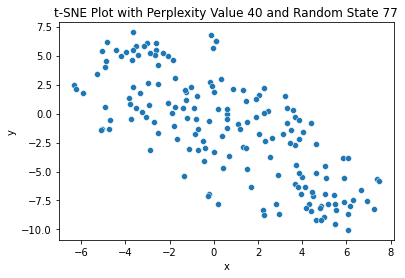

--------------------------------------------


C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


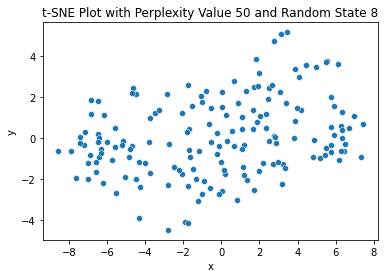

C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


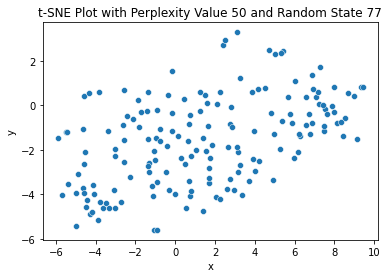

--------------------------------------------


In [14]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [8,77]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df_stand, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

**Clustering Structure**

While we don't see any strong clustering structure in the t-SNE plots with perplexity values of 5, 40, or 50, we do see some evidence of a weak (potentially overlapping) clustering structure with perplexity values 10, 20, and 30.

**Number of Clusters, Separation of Clusters, Cluster Shapes, and Clusters Sizes**

In the plots with perplexity values of 10, 20, and 30, we see that there may exist 3 overlapping clusters that are somewhat spherical in shape. It looks like the cluster in the middle (see plot below) has more countries than the two clusters on the sides.

C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


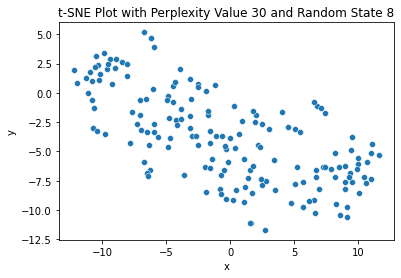

In [15]:
tsne = TSNE(n_components=2, perplexity=30, random_state=8)
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([df_stand, df_tsne], axis=1)
sns.scatterplot(x='x',y='y', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8))
plt.show()

### Naive Implementation of a Hierarchical Agglomerative Clustering Algorithm

First, let's assume we don't have any idea about what kind of hierarchical clustering algorithm that we would like to use.

Let's use:
* the **single linkage** function to measure the distance **between two clusters** and
* the **euclidean distance** to measure the distance **between two objects** in this dataset.

First, we need to create a distance matrix of all pairs of objects in the **scaled dataframe X** by using the **pdist()** function from the **scipy.spatial.distance** package.

In [16]:
dm = pdist(X, metric='euclidean')
dm

array([4.1433458 , 3.89755192, 2.99964628, ..., 3.4410128 , 4.3667908 ,
       2.17296707])

Next, using this distance matrix 'dm', we actually run the HAC with **single linkage** algorithm using the **linkage()** function from the **scipy.cluster.hierarchy** package. The output of the linkage() function is the resulting hierarchical clustering encoded as a linkage matrix.

In [17]:
Z = linkage(dm, method='single')
Z

array([[4.10000000e+01, 1.21000000e+02, 2.70510920e-01, 2.00000000e+00],
       [7.50000000e+01, 1.39000000e+02, 3.45939626e-01, 2.00000000e+00],
       [2.40000000e+01, 8.50000000e+01, 4.23131474e-01, 2.00000000e+00],
       [1.58000000e+02, 1.68000000e+02, 4.44395323e-01, 3.00000000e+00],
       [6.00000000e+01, 1.70000000e+02, 4.87069892e-01, 4.00000000e+00],
       [1.11000000e+02, 1.71000000e+02, 4.94330379e-01, 5.00000000e+00],
       [9.20000000e+01, 1.69000000e+02, 5.15096219e-01, 3.00000000e+00],
       [1.00000000e+02, 1.73000000e+02, 5.16371769e-01, 4.00000000e+00],
       [1.22000000e+02, 1.72000000e+02, 5.44105161e-01, 6.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 5.59540632e-01, 2.00000000e+00],
       [5.30000000e+01, 1.44000000e+02, 5.68799380e-01, 2.00000000e+00],
       [2.90000000e+01, 5.40000000e+01, 5.90319960e-01, 2.00000000e+00],
       [1.30000000e+01, 1.67000000e+02, 5.99154033e-01, 3.00000000e+00],
       [2.00000000e+01, 1.30000000e+02, 6.04562360e

Finally, we can use this linkage matrix, Z, to create our dendrogram by using the **dendrogram()** function from the **scipy.cluster.hierarchy** package.

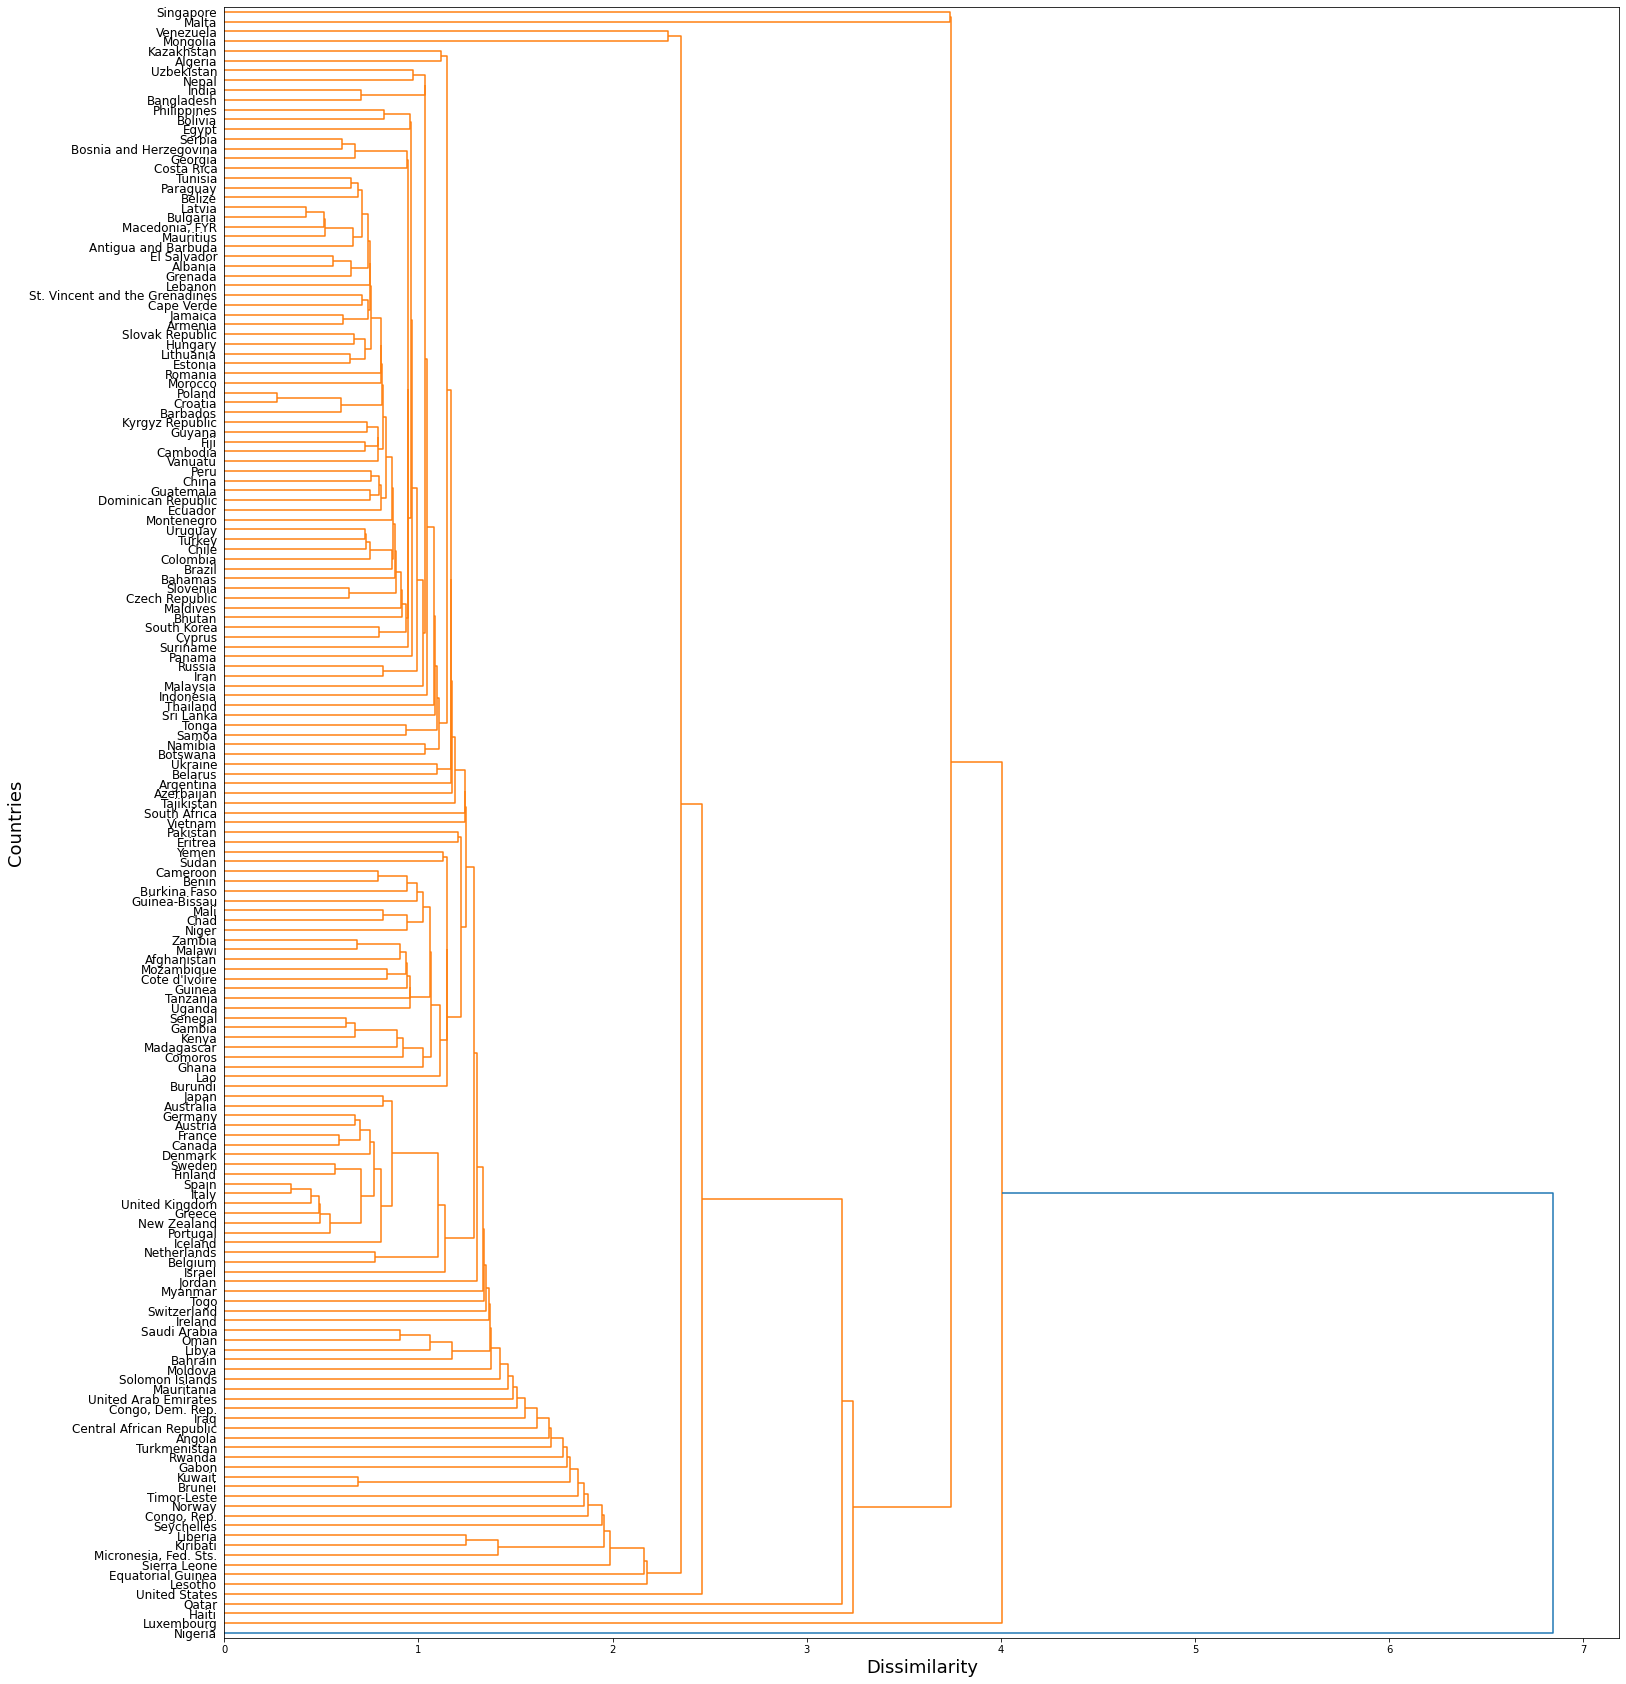

In [18]:
fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', labels=df_stand['country'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

Let's say we would like to extract the clustering from this dendrogram with k=2 clusters. The dendrogram shows us that this would be the clustering with Nigeria in a singleton cluster, and then all other countries in the other clusters. 

To use code to extract this single clustering with k=2 clusters, we can use the **AgglomerativeClustering()** function from the **sklearn.clustering** package along with the:
* n_clusters: (number of clusters in the clustering that you would like to extract)
* affinity: the distance metric you would like to use to measure distance *between two objects*
* linkage: the linkage function

In [19]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hac

AgglomerativeClustering(linkage='single')

Then you can use the **.fit_predict()** function along with the dataframe of numerical attributes that you would like to cluster. The output is a series of cluster labels.

In [20]:
df_stand['predicted_cluster_single_2'] = hac.fit_predict(X)
df_stand.sort_values(['predicted_cluster_single_2'])

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
106    1.560136 -0.351593 -0.586317 -0.028596 -0.844249  -0.013458   
107    0.649869 -1.500192 -1.769403 -1.939940 -0.698465  -0.070389   
108    0.440955  0.244825 -0.013032  0.572142 -0.451851  -0.400591   
109    0.217119 -1.153648 -0.571711 -0.434611 -0.788475   0.694389   
..          ...       ...       ...       ...       ...        ...   
57    -0.541436 -0.223528  1.199266  0.244843 -0.541860   0.072888   
58    -0.847345  0.043580  1.746991 -0.405610  1.209937  -0.666461   
59     0.906037 -0.424773 -0.582666 -0.041025 -0.732804   0.836717   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   
113    2.281385 -0.578452 -0.637438 -1.221785 -0.624065   9.129718   

     life_expec  total_fer      gdpp      country  predicted_cluster_single_2  
0     -1.619092   1.902882 -0.679180  Afghanistan                           0  
106   -1.810825   1.730618 -0.686513   Mozambique                           0  
107   -0.423582  -0.356431 -0.655375      Myanmar                           0  
108   -1.348410   0.432010 -0.425428      Namibia                           0  
109   -0.254406  -0.223920 -0.677045        Nepal                           0  
..          ...        ...       ...          ...                         ...  
57     0.253122  -0.681083 -0.547461      Georgia                           0  
58     1.076446  -1.032237  1.577993      Germany                           0  
59    -0.942388   0.875922 -0.637754        Ghana                           0  
166   -2.092785   1.624609 -0.629546       Zambia                           0  
113   -1.134121   1.916133 -0.581936      Nigeria                           1  

[167 rows x 11 columns]

What if we wanted to extract the clustering with k=3 clusters from the dendrogram instead?

In [21]:
hac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
df_stand['predicted_cluster_single_3'] = hac.fit_predict(X)
df_stand.sort_values(['predicted_cluster_single_3'])

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
106    1.560136 -0.351593 -0.586317 -0.028596 -0.844249  -0.013458   
107    0.649869 -1.500192 -1.769403 -1.939940 -0.698465  -0.070389   
108    0.440955  0.244825 -0.013032  0.572142 -0.451851  -0.400591   
109    0.217119 -1.153648 -0.571711 -0.434611 -0.788475   0.694389   
..          ...       ...       ...       ...       ...        ...   
58    -0.847345  0.043580  1.746991 -0.405610  1.209937  -0.666461   
51    -0.839884  1.243734 -0.286894  0.903583  0.289034  -0.573283   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   
113    2.281385 -0.578452 -0.637438 -1.221785 -0.624065   9.129718   
91    -0.882164  4.899083  0.348467  3.940415  3.878996  -0.394898   

     life_expec  total_fer      gdpp      country  predicted_cluster_single_2  \
0     -1.619092   1.902882 -0.679180  Afghanistan                           0   
106   -1.810825   1.730618 -0.686513   Mozambique                           0   
107   -0.423582  -0.356431 -0.655375      Myanmar                           0   
108   -1.348410   0.432010 -0.425428      Namibia                           0   
109   -0.254406  -0.223920 -0.677045        Nepal                           0   
..          ...        ...       ...          ...                         ...   
58     1.076446  -1.032237  1.577993      Germany                           0   
51     0.614031  -0.813594  0.089519      Estonia                           0   
166   -2.092785   1.624609 -0.629546       Zambia                           0   
113   -1.134121   1.916133 -0.581936      Nigeria                           1   
91     1.211786  -0.873224  5.036507   Luxembourg                           0   

     predicted_cluster_single_3  
0                             0  
106                           0  
107                           0  
108                           0  
109                           0  
..                          ...  
58                            0  
51                            0  
166                           0  
113                           1  
91                            2  

[167 rows x 12 columns]

The benefit of looking at only one clustering extracted from a dendrogram, is that we can color code the resulting cluster labels in our t-SNE plot to learn more about how the cluster labels from the clustering algorithm associate with the underlying clustering structure that is suggested by our t-SNE plot.

In [22]:
df_combo['predicted_cluster_single_3']=df_stand['predicted_cluster_single_3']

In [23]:
df_combo['predicted_cluster_single_3']=df_combo['predicted_cluster_single_3'].replace({0:'Other Countries', 1:'Nigeria', 2:'Luxemborg'})
df_combo.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp              country         x         y  \
0   1.902882 -0.679180          Afghanistan  9.977718 -6.102662   
1  -0.859973 -0.485623              Albania -1.535645 -3.253344   
2  -0.038404 -0.465376              Algeria  0.477724 -8.289312   
3   2.128151 -0.516268               Angola  9.170123 -9.732614   
4  -0.541946 -0.041817  Antigua and Barbuda -4.244272 -2.292098   

  predicted_cluster_single_3  
0            Other Countries  
1            Other Countries  
2            Other Countries  
3            Other Countries  
4            Other Countries

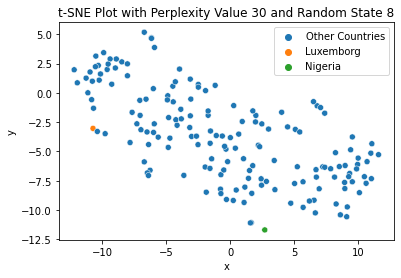

In [24]:
sns.scatterplot(x='x',y='y', hue='predicted_cluster_single_3', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

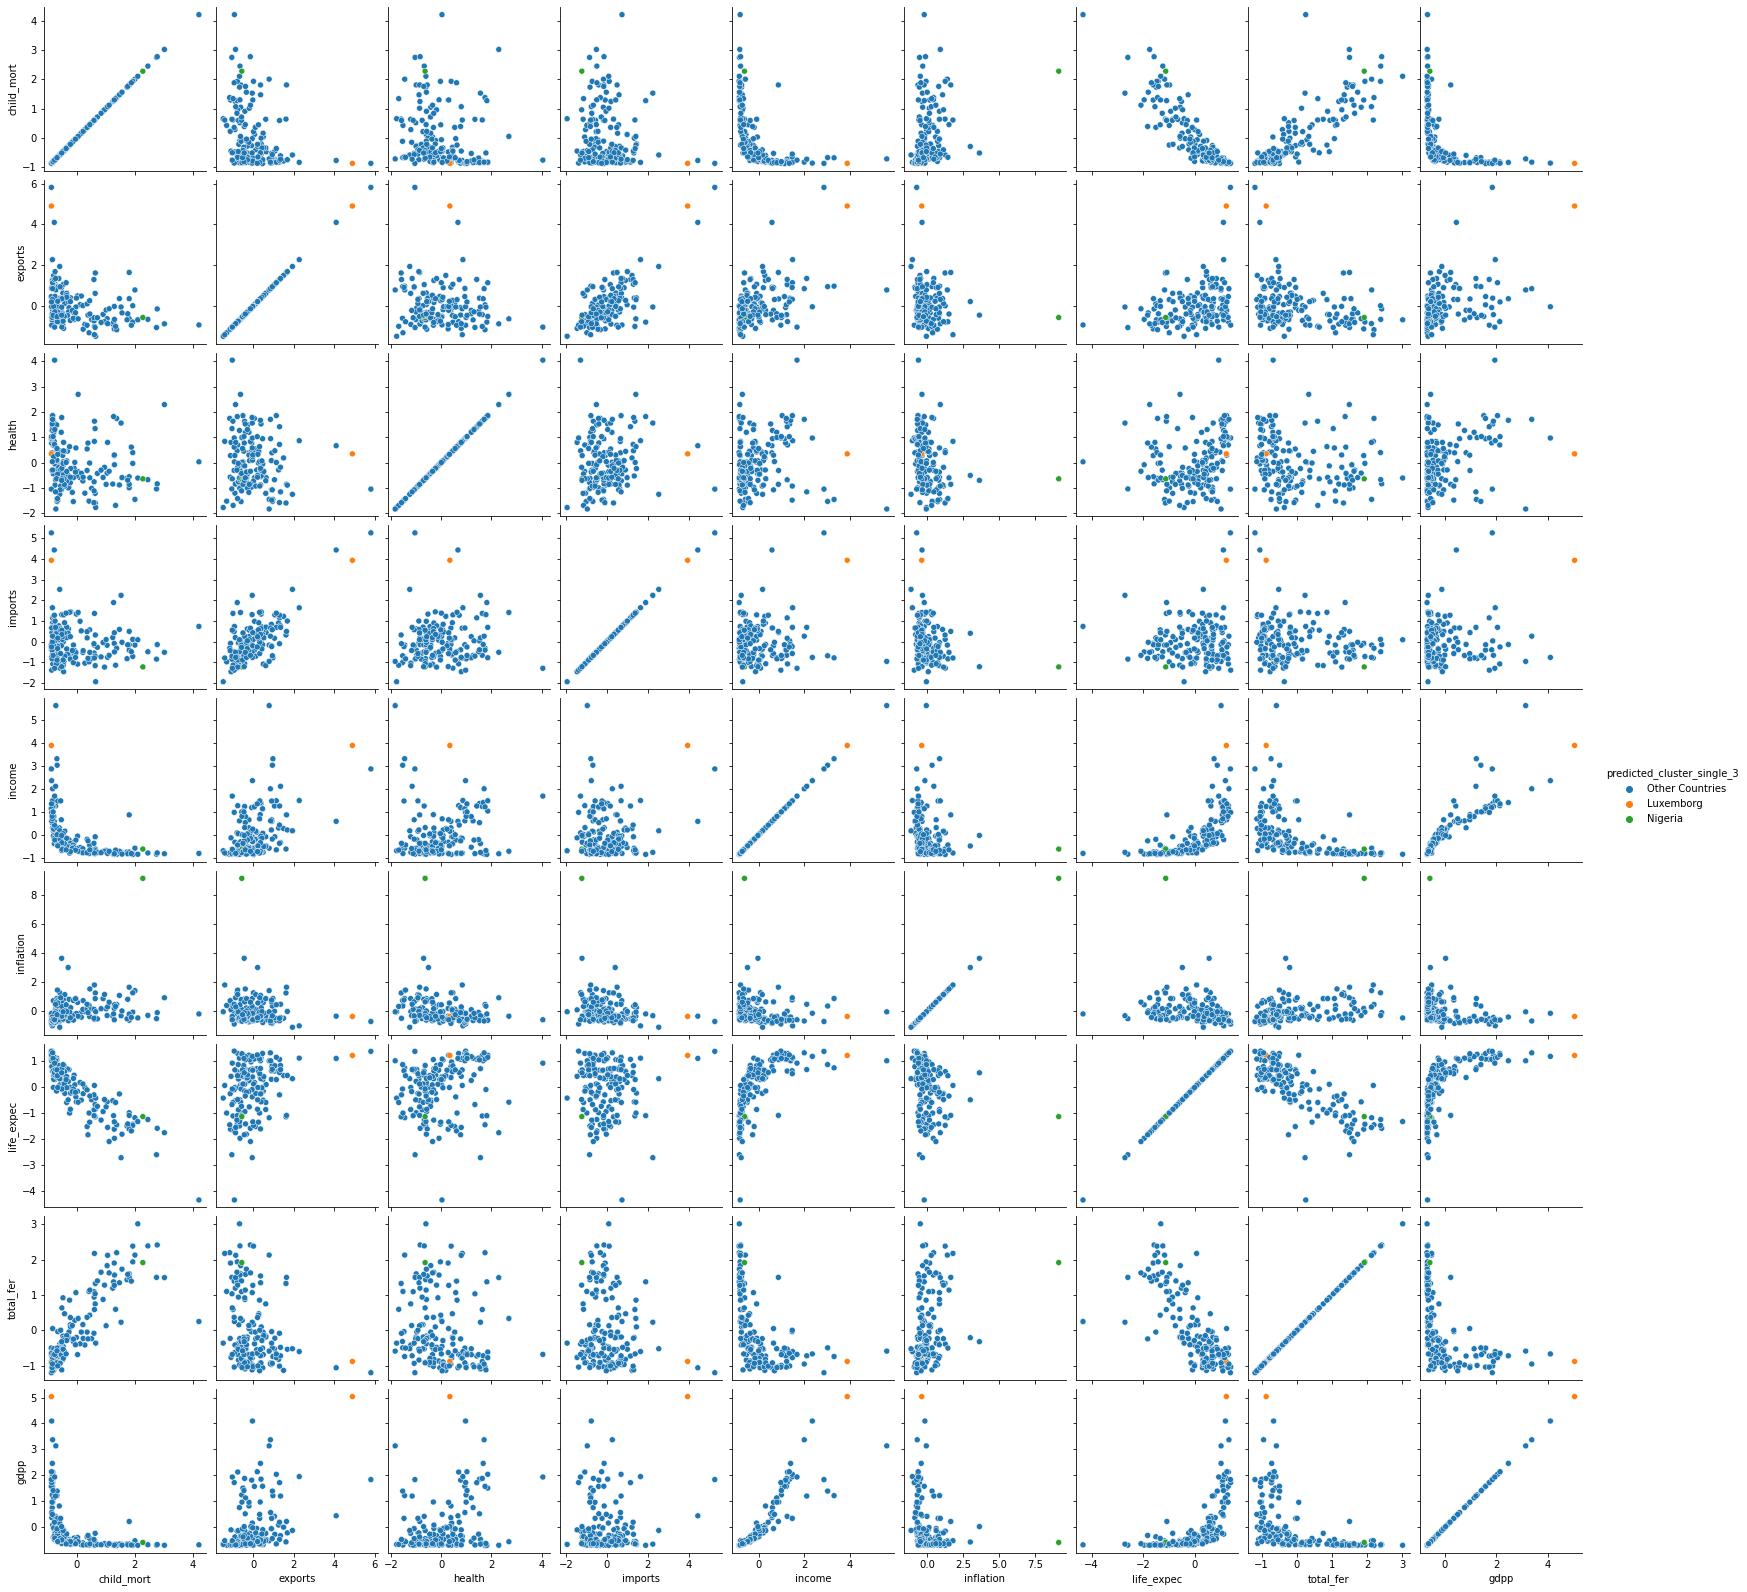

In [25]:
sns.pairplot(df_combo.drop(['x','y'], axis=1), diag_kind=None, hue='predicted_cluster_single_3')
plt.show()

It looks like Nigeria and Luxemborg might be outliers. HAC with single linkage can useful at detecting outliers, however, sometimes at the expense of identifying the actual clusters.

### Which clustering algorithm to use?

#### <u>Thinking about what we know so far about the dataset and our overall goal for the cluster analysis</u>

1. **Cluster Closeness** In addition to creating a single partition clustering of the countries, we would like to try to determine the *distances* of the *clusters*. Are some clusters of countries closer than other clusters of countries? Thus, using a hierarchical clustering algorithm (instead of a partition-based clustering algorithm like k-means) might provide us with this additional information.

2. **Outlier Detection** In addition, we would like to determine if there are outlier countries in our dataset that are highly separated from the main clusters of non-outlier countries. Hierarchical agglomerative clustering might be able to determine the existence of these outliers, however, potentially at the expense of identifying the main clusters in the dataset. Our pairwise scatterplots above suggested that that there may be some outliers in this dataset, so it's possible that single linkage may not be able to identify the main clusters as well as other clustering algorithms.

3. **k-means, HAC with single linkage and Ward's linkage not the best choice** In addition, our t-SNE plots suggest the clusters in the dataset might be highly overlapping. k-means, hierarchical agglomerative clustering (HAC) algorithms that use single linkage and Ward's linkage tend to not work as well when the clusters are highly overlapping. This suggests that HAC algorithms with complete linkage and average linkage might perform better.


#### <u>Clustering algorithm selection</u>

We can use the average silhouette score to help us select the best clustering algorithm to use for this dataset.

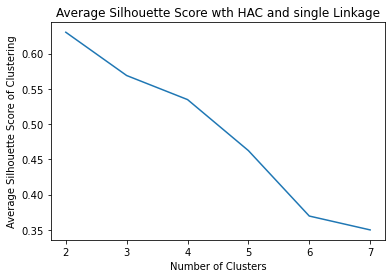

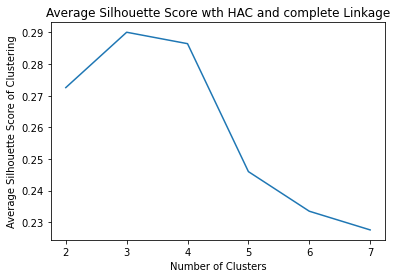

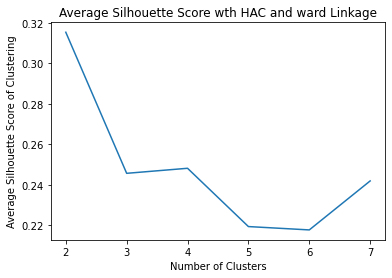

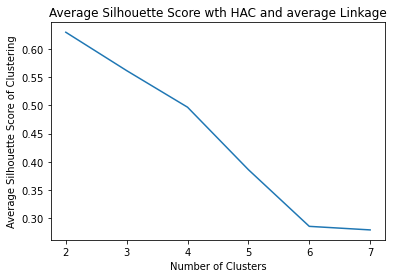

In [26]:
for link in ['single', 'complete', 'ward', 'average']:
    avg_ss=[]
    for k in [2,3,4,5,6,7]:
        #First, designate the HAC linkage function, and the number of clusters you want to extract from the resulting dendrogram
        hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=link)
        Y_pred = hac.fit_predict(X)
        avg_ss.append(silhouette_score(X, Y_pred))
        
    plt.plot([2,3,4,5,6,7], avg_ss)
    plt.title('Average Silhouette Score wth HAC and %s Linkage'%link)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score of Clustering')
    plt.show()
    


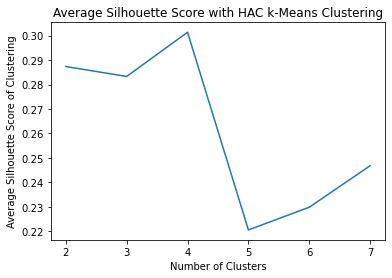

In [27]:
avg_ss=[]
for k in [2,3,4,5,6,7]:
    #First, designate the HAC linkage function, and the number of clusters you want to extract from the resulting dendrogram
    for trial in range(0,3):
        sub_list=[]
        kmeans = KMeans(n_clusters=k)
        Y_pred = kmeans.fit_predict(X)
        sub_list.append(silhouette_score(X, Y_pred))
    avg_ss.append(np.average(sub_list))

plt.plot([2,3,4,5,6,7], avg_ss)
plt.title('Average Silhouette Score with HAC k-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score of Clustering')
plt.show()

#### Interpretation

It looks like the clustering and cluster number that produced the highest average silhouette score above is a HAC with single linkage and k=2 clusters. However, we know from above that this produced a clustering with just one country in one cluster, and the remaining countries in another cluster. This is not an insightful clustering. What may be going on is that the HAC with single linkage is just identifying outliers as clusters, at the expense of being able to identify the main clusters in the data that we are looking for. In the presence out outliers, this sometimes what HAC with single linkage will do. Thus, it may be better to examine the average silhouette score plots for HAC algorithms with complete linkage or average linkage which tend to be more robust to outliers.

For good measure, we will try out all four linkage functions in HAC and examine what kind of results that we get.

### HAC with Single Linkage

Let's first examine the dendrogram and clustering results (extracted clustering results with k=2,..., and k=7 clusters) using the HAC with single linkage first.

#### Dendrogram
We have already created a dendrogram for HAC with single linkage, but here it is again. In the dendrogram, we can see that if create/extract clustering with k=2,k=3,...,k=7 clusters, that the HAC with single linkage will just 'pick off' outlier observations one at a time, without revealing any of the actual larger clusters that the t-SNE plot is suggest that there is.

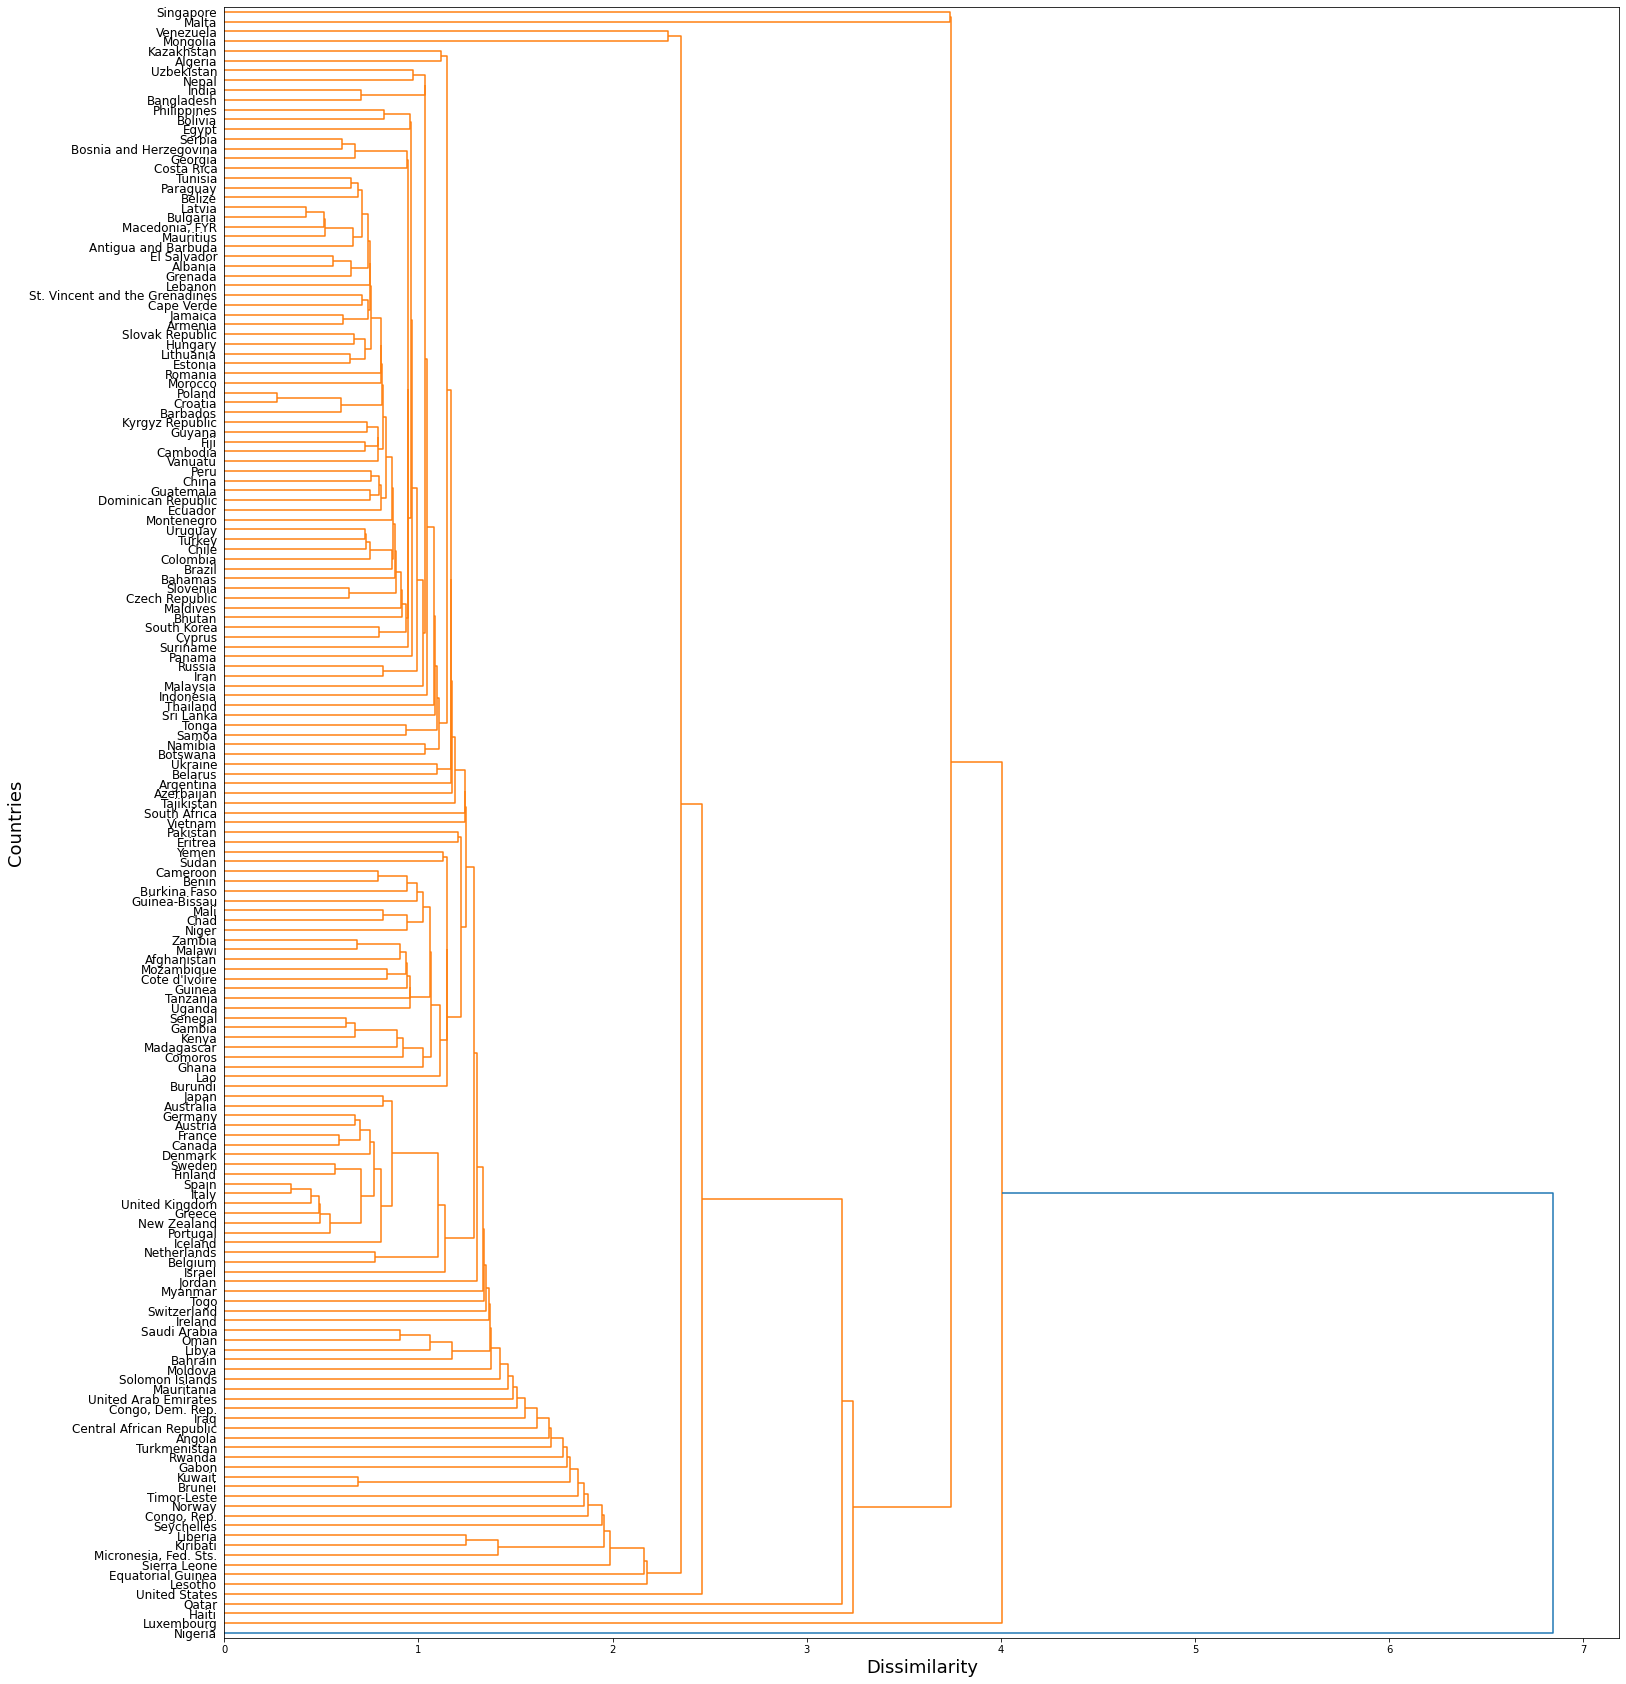

In [28]:
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='single')

fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', labels=df_stand['country'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

#### Extracted Clusterings from the Dendrogram
We can see this relationship as well if we were to extract the clustering with k=2,k=3,..., k=7 clusters and map them onto our t-SNE plot. This result is not an uncommon thing to see when HAC with single linkage is applied to a dataset with outliers.

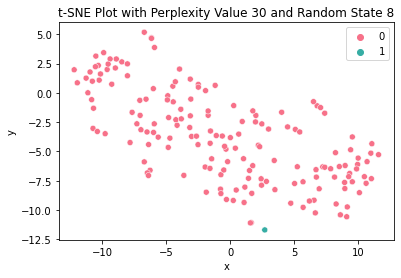

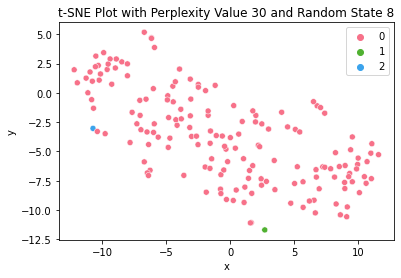

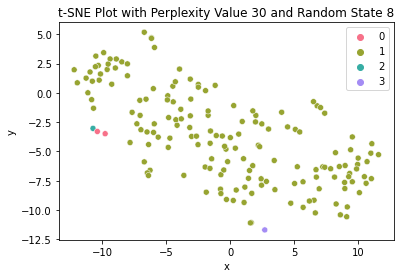

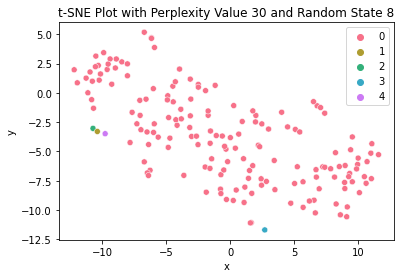

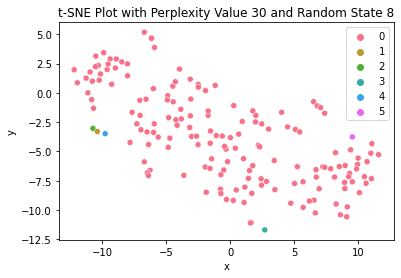

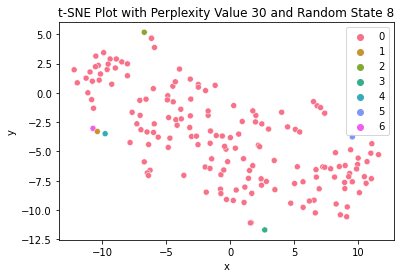

In [29]:
for k in range(2,8):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    df_combo['predicted_cluster'] = hac.fit_predict(X)
    
    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

### HAC with Complete Linkage

Let's next examine the dendrogram and clustering results (extracted clustering results with k=2,..., and k=7 clusters) using the HAC with complete linkage.

#### Dendrogram
The dendrogram for HAC with complete linkage is below. In the dendrogram, we can see that if create/extract clustering with k=2,k=3,...,k=7 clusters are able to identify larger clusters of data. However, we still see some singleton clusters getting separated from the rest of the dataset like Nigeria and Qatar. In addition, we see a small cluster comprised of just three countries: Malta, Luxemborg, and Singapore.

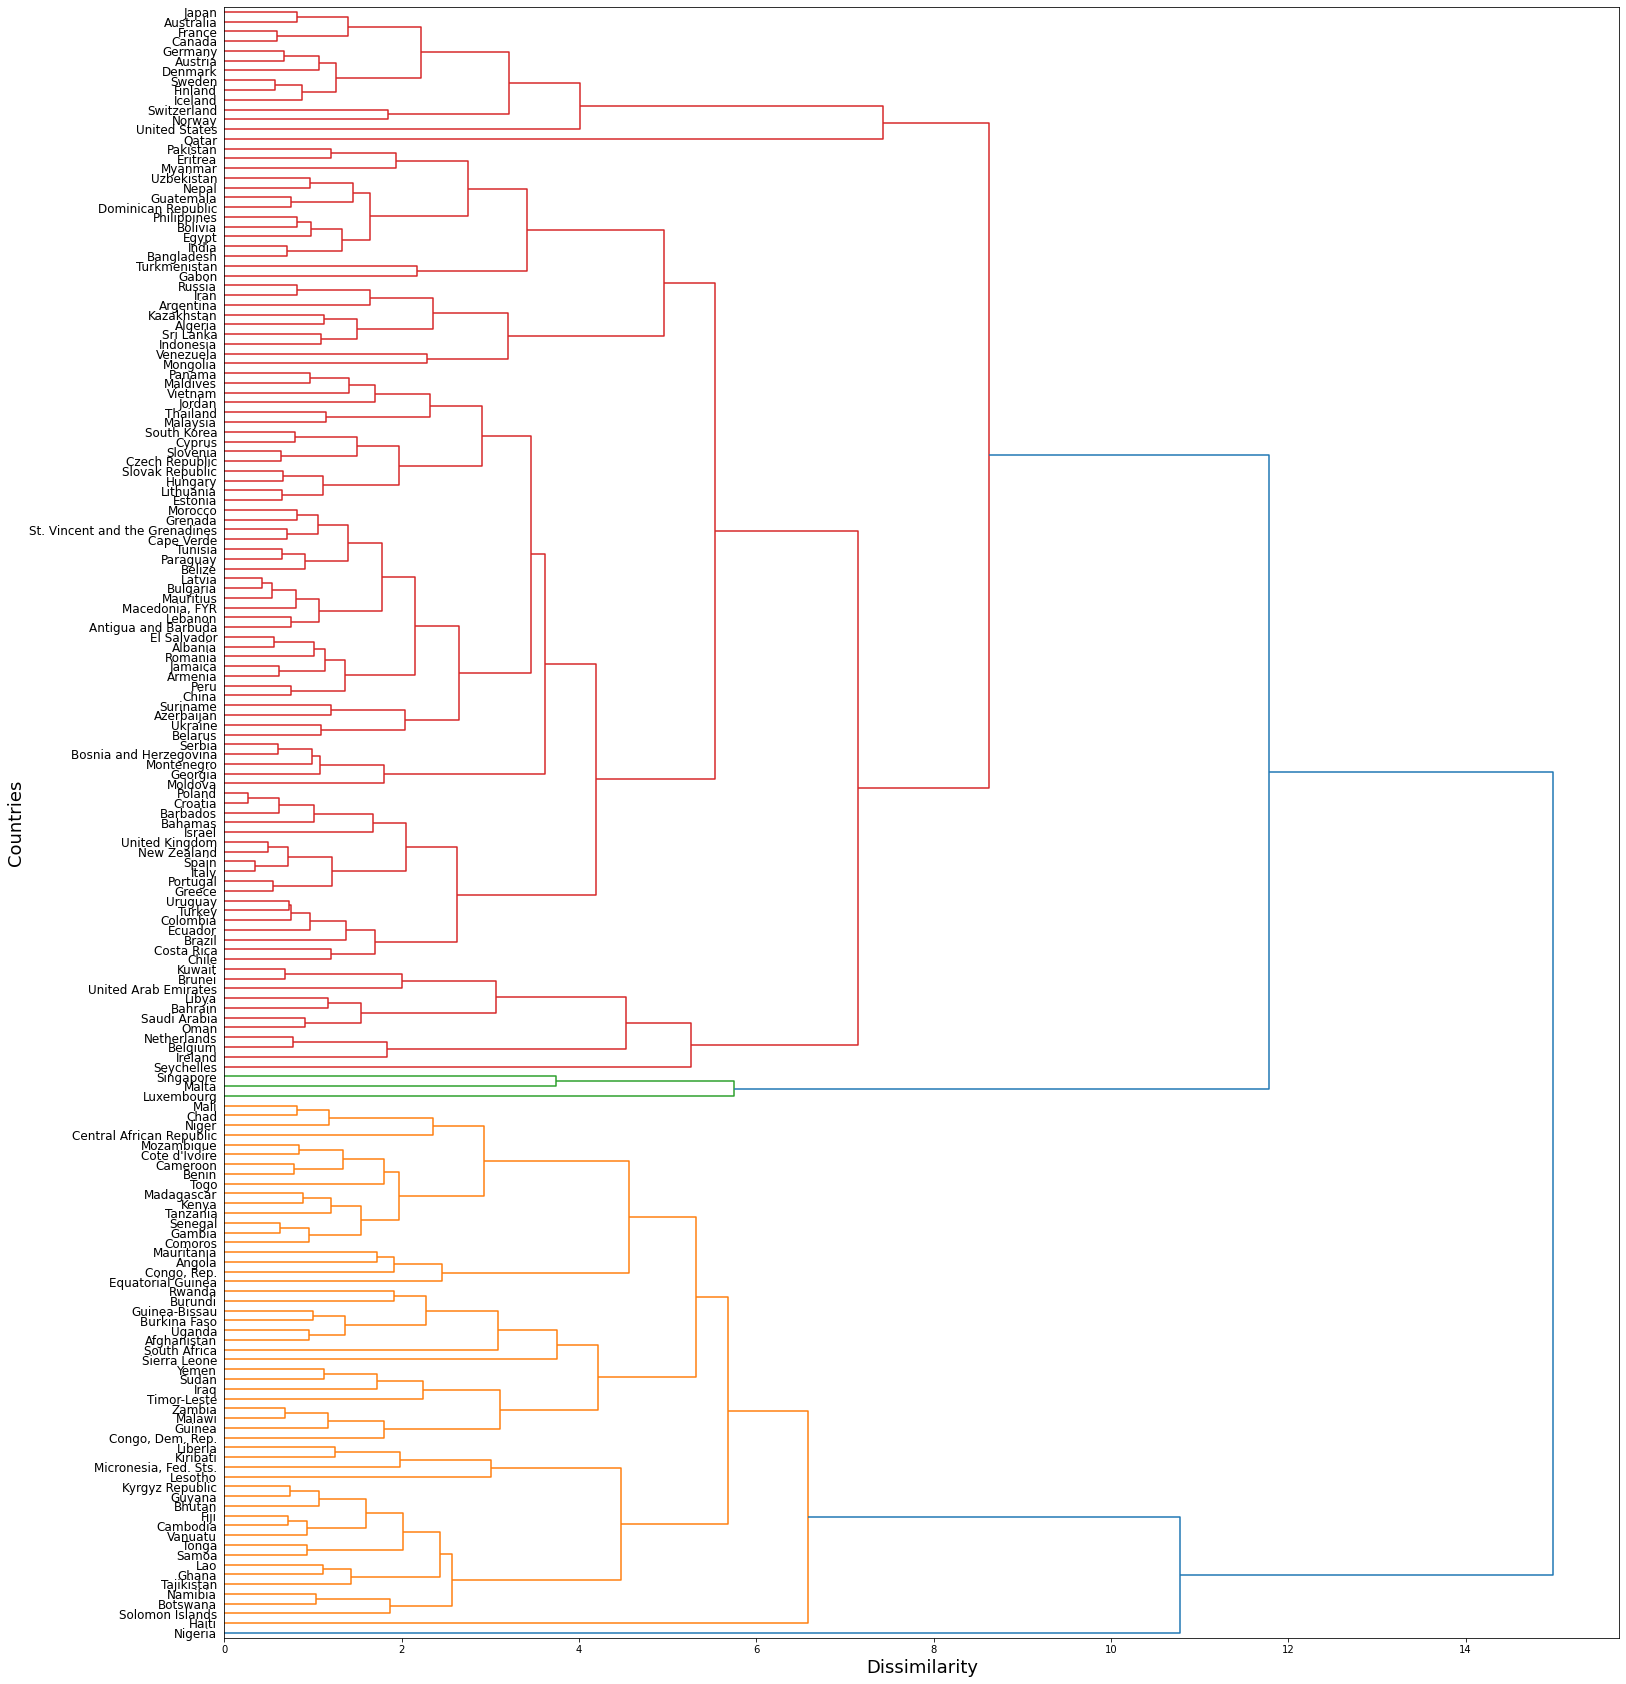

In [30]:
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='complete')

fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', labels=df_stand['country'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

#### Extracted Clusterings from the Dendrogram

We can see this relationship as well if we were to extract the clustering with k=2,k=3,..., k=7 clusters and map them onto our t-SNE plot. While we know that this dataset has outliers, HAC with complete linkage demonstrated that it was not as sensitive to these outliers.

Something to take note of, is that there is some disagreement between what the t-SNE plot is suggesting is a main cluster vs. what HAC with complete linkage is suggesting is a main cluster. For instance, in the t-SNE plot below, we can see that the larger cluster in the center is mostly comprised of countries in cluster 0 (from HAC-complete with k=2 clusters), whereas some of these countries are labeled with cluster 1 (from HAC-complete with k=2 clusters).

Furthermore, while the t-SNE plot suggests that the three most "main clusters" in this dataset are the large one in the middle of the plot, the slightly smaller one in the top left of the plot, and the slightly smaller one on the bottom left of the plot, HAC-complete with k=3 clusters decides to split the small cluster of Malta, Luxemborg, and Singapore from the rest of the dataset first.

In fact, with HAC-complete linkage, the spherical cluster suggested in the top left of the plot is never actually completed separated from the rest of dataset, and rather is iteratively split apart into small country subsets.

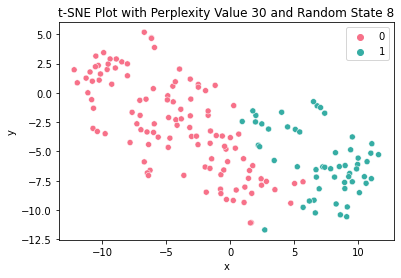

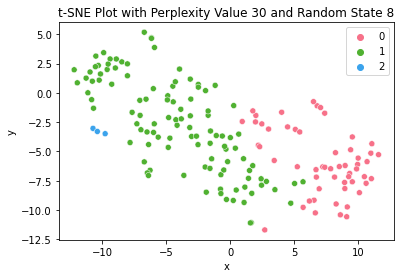

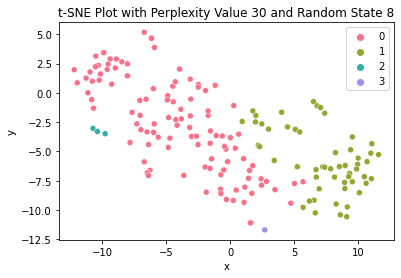

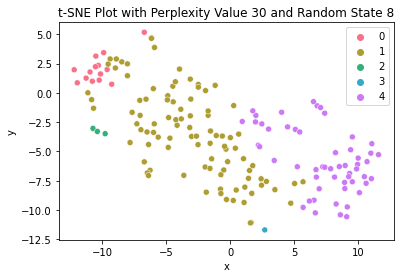

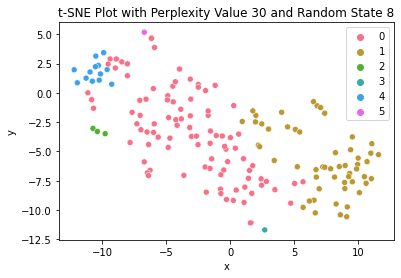

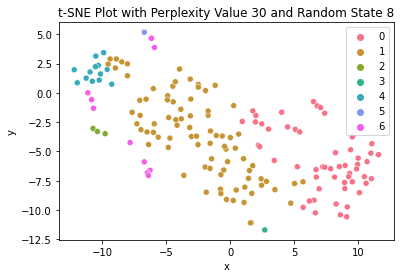

In [31]:
for k in range(2,8):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    df_combo['predicted_cluster'] = hac.fit_predict(X)
    
    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

### HAC with Average Linkage

Let's next examine the dendrogram and clustering results (extracted clustering results with k=2,..., and k=7 clusters) using the HAC with average linkage.

#### Dendrogram
The dendrogram for HAC with average linkage is below. In the dendrogram, we can see that if create/extract clusterings with k=2,k=3,...,k=7 clusters, most of the clusters that are created are singleton clusters (Nigeria, Qatar), it identifies the small cluster of three countries of Luxemborg, Singapore, and Malta. By the time we get to a clustering with k=7 clusters, most countries are still all together in one cluster.

However, if we keep increasing the number of clusters, eventually we find some larger clusters of countries that are created.

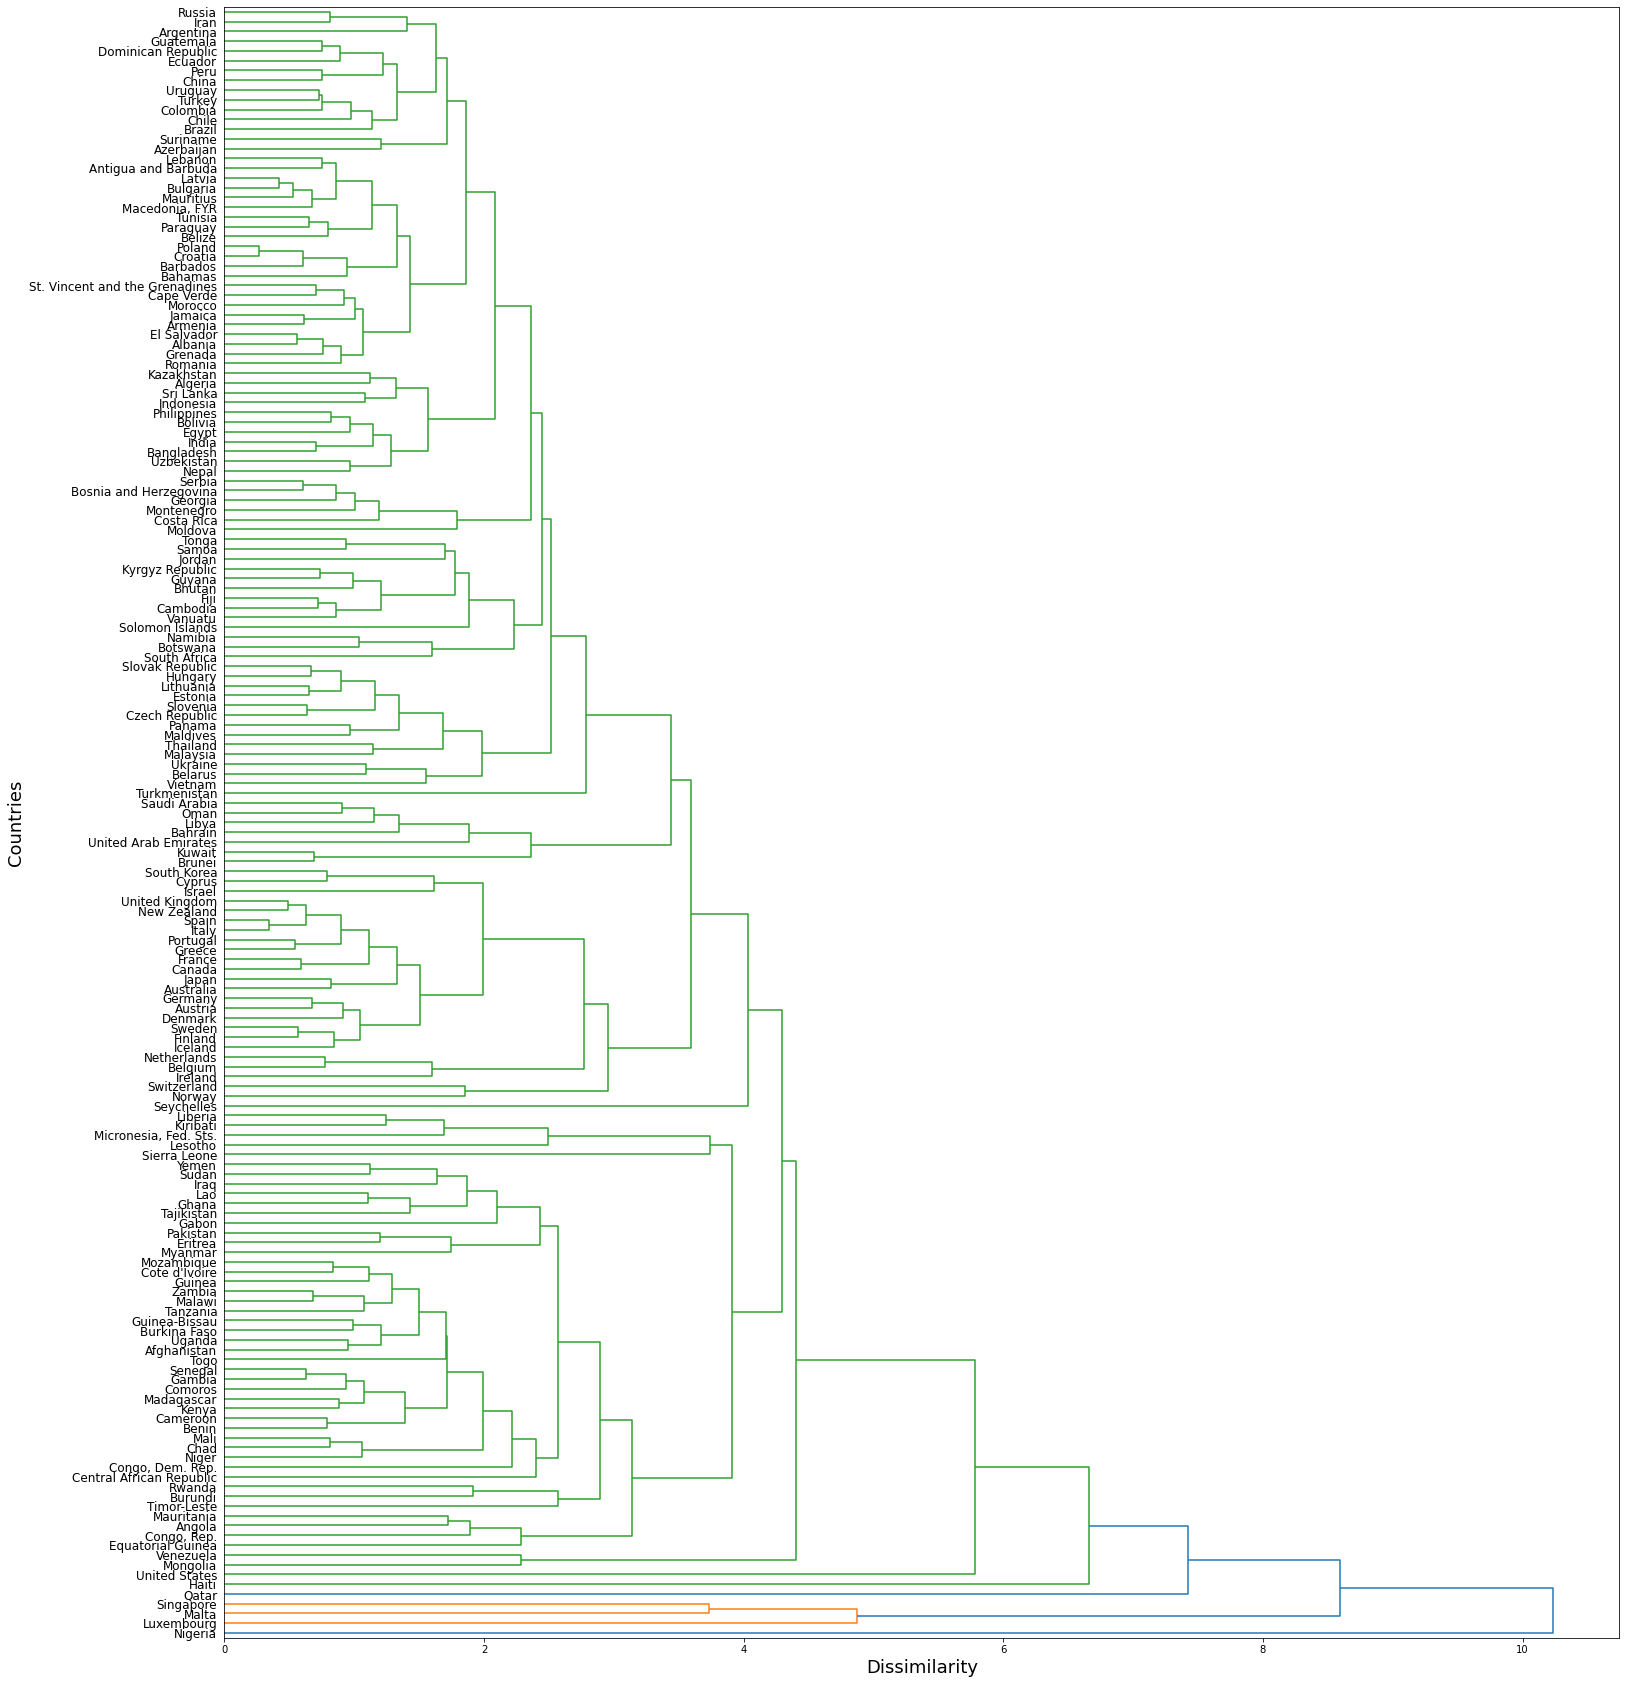

In [32]:
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='average')

fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', labels=df_stand['country'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

#### Extracted Clustering from the Dendrogram

For instance, we can see that the clustering with k=9 clusters finally separates the the larger cluster of countries suggested in the bottom right of the t-SNE plot below from the rest of the data. And the clustering with k=14 clusters finally separated the larger cluster suggested in the top left of the t-SNE plot from the larger cluster suggested in the center of the t-SNE plot.

Thus, the results suggested by HAC with average linkage are able to identify outliers (found in the singleton clusters) as well as larger cluster structures. However, whether we would consider all of the objects that were "picked off" into singleton clusters as outliers rather than belonging in a larger cluster could be subjective.

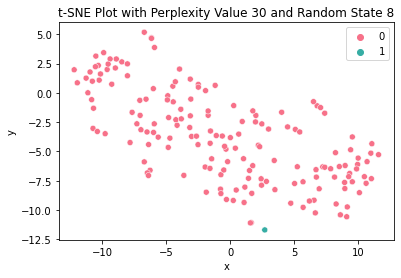

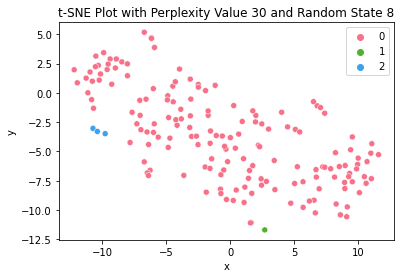

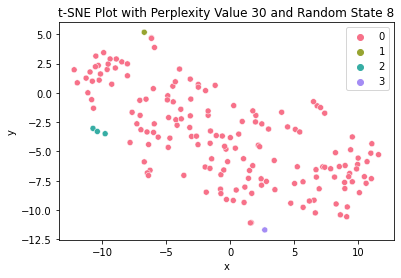

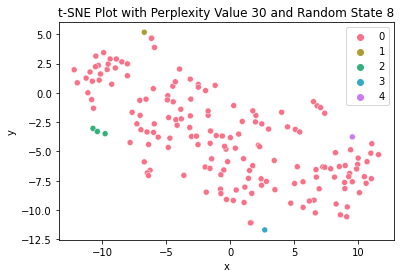

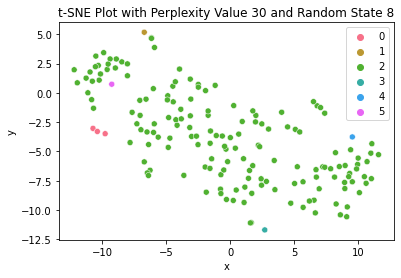

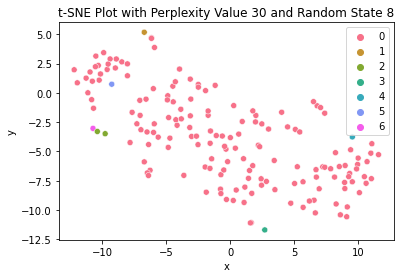

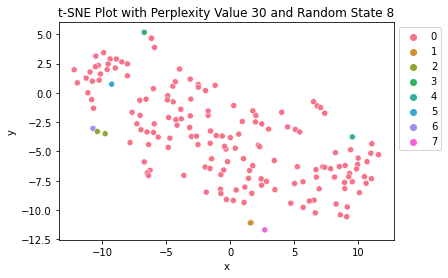

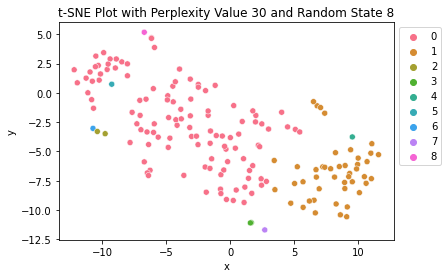

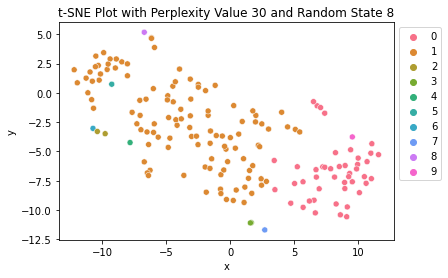

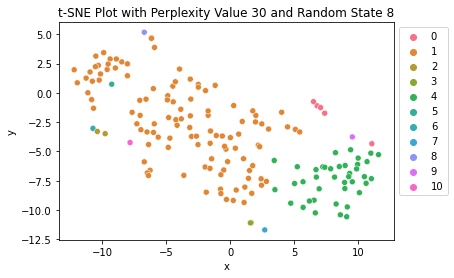

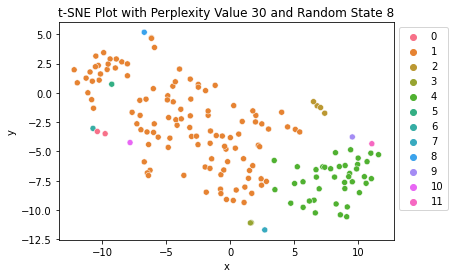

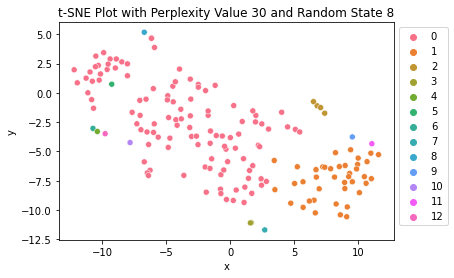

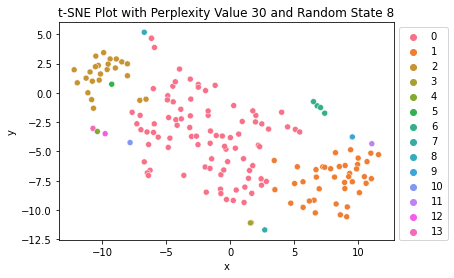

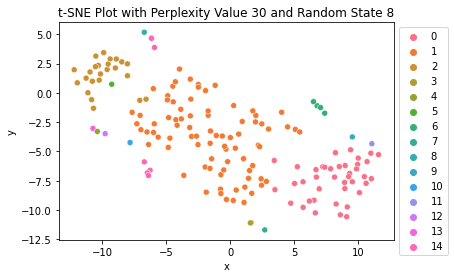

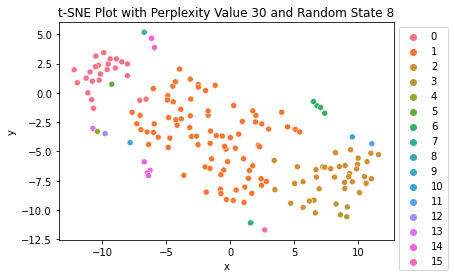

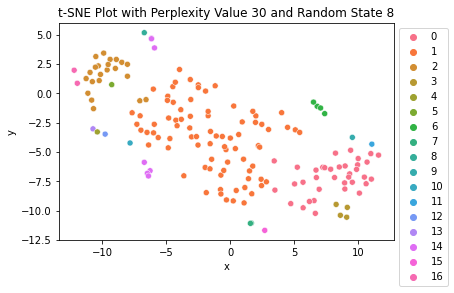

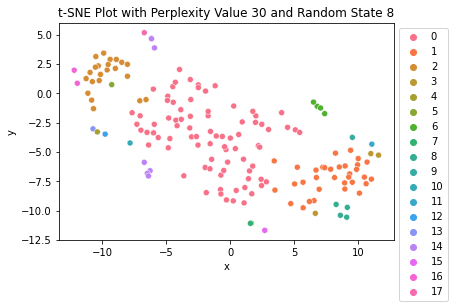

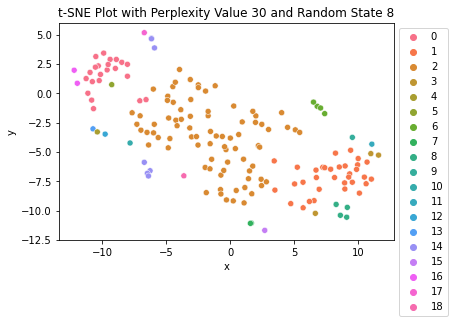

In [33]:
for k in range(2,20):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    df_combo['predicted_cluster'] = hac.fit_predict(X)
    
    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

### HAC with Ward's Linkage

We'll next examine the dendrogram and clustering results (extracted clustering results with k=2,..., and k=7 clusters) using the HAC with Ward's linkage.

#### Dendrogram
The dendrogram for HAC with Ward's linkage is below. In the dendrogram, we can see that the first three clusters identified are all large clusters. These three clusters have quite a lot of overlap with the three "main clusters" suggested by the t-SNE plots. However (see plots below), there are some disagreements, particularly for countries that look like they might be "straddle nodes" between two clusters.

In the clustering with k=4 clusters, we see the small cluster of Malta, Singapore, and Luxemborg separated.

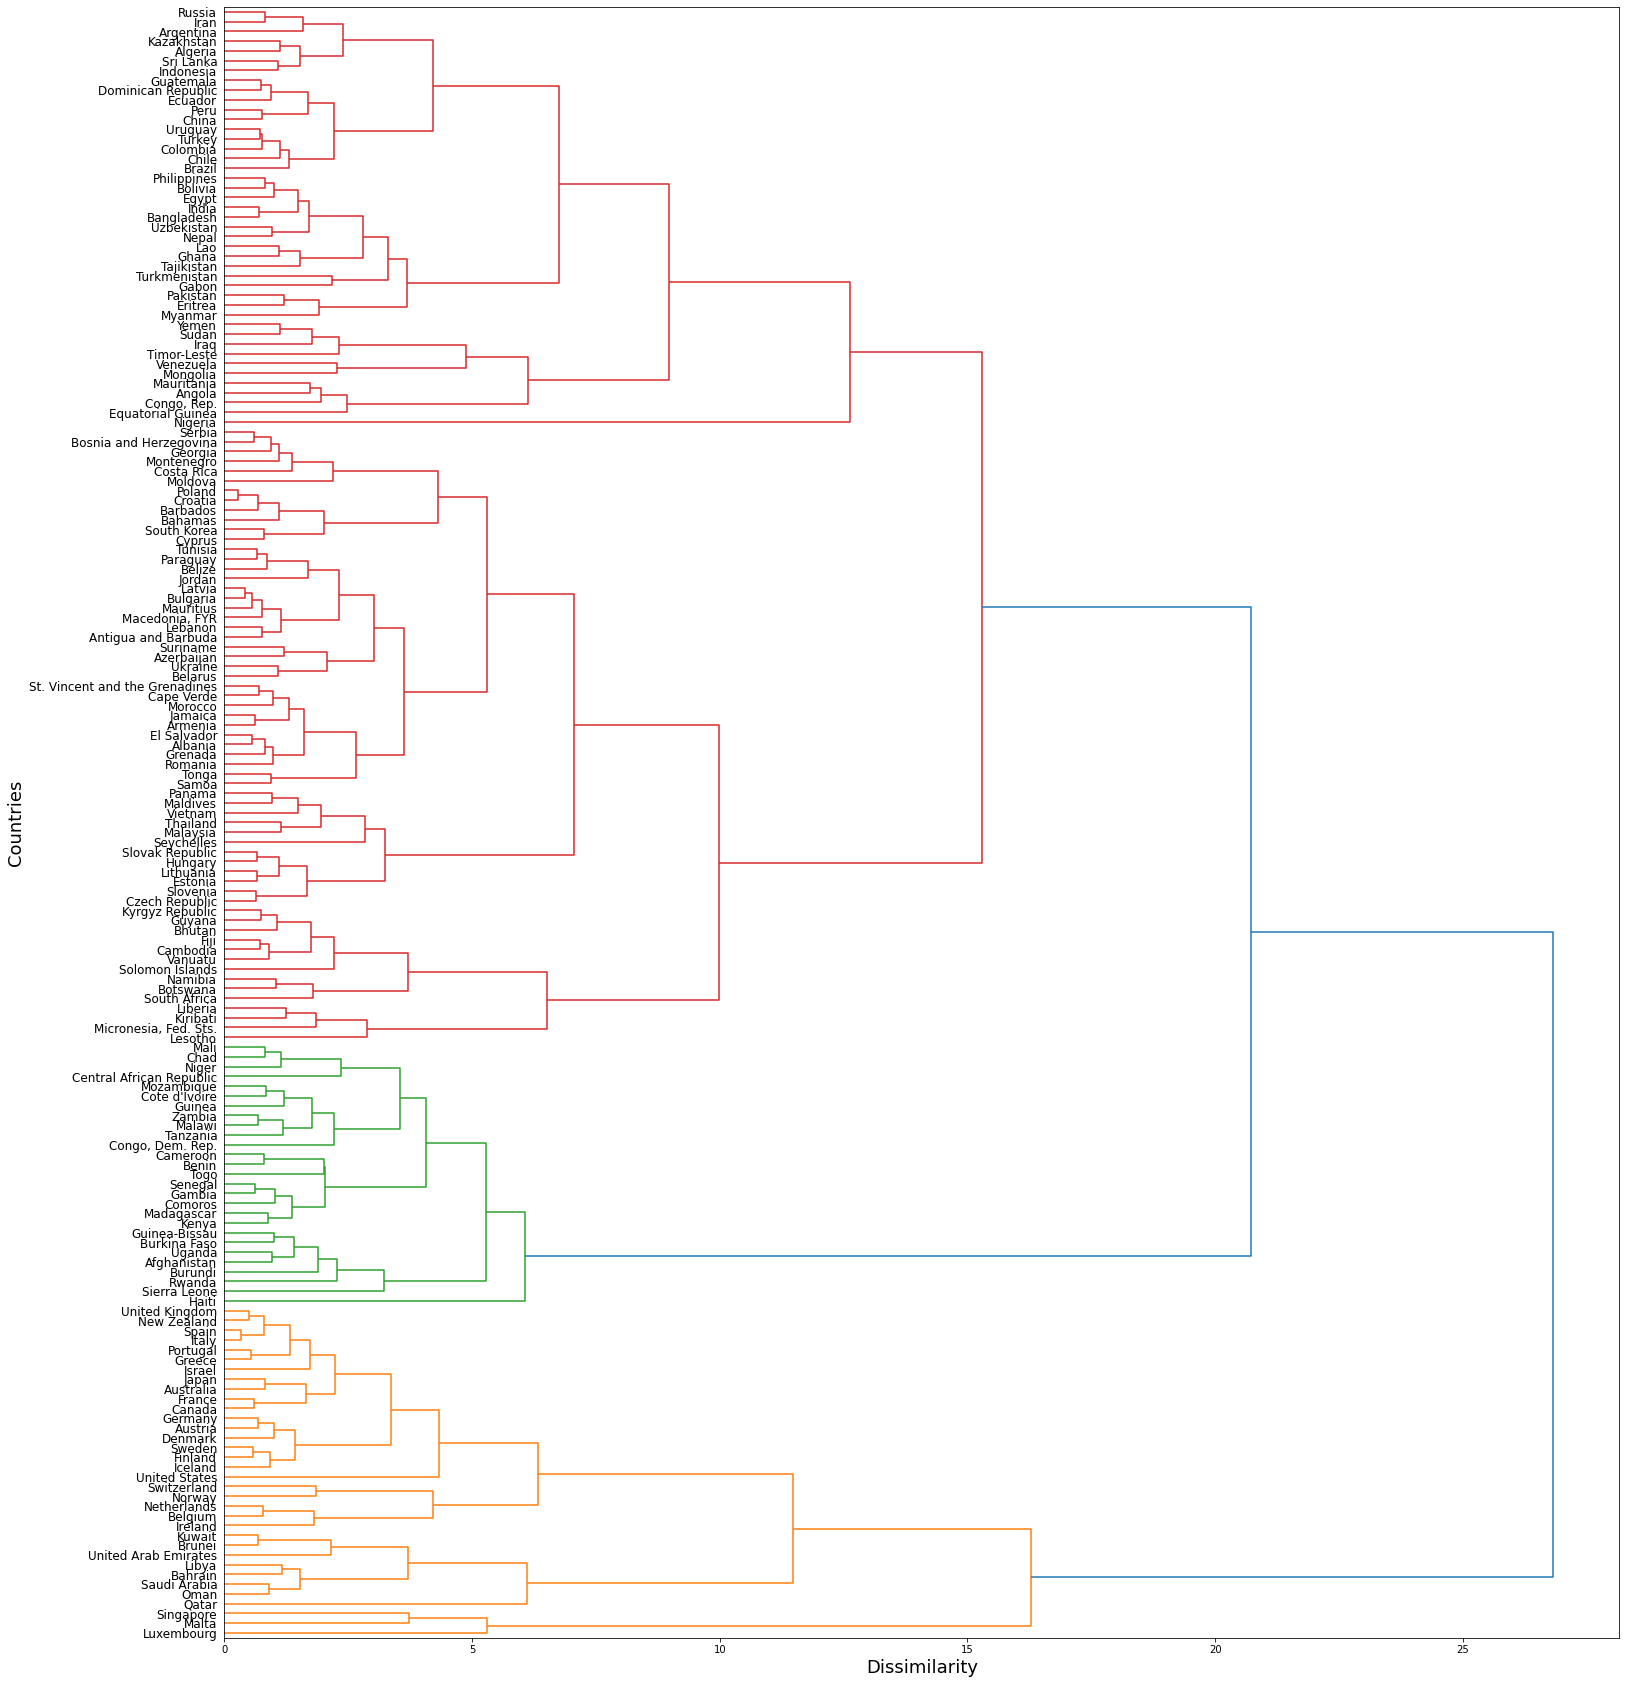

In [34]:
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='ward')

fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', labels=df_stand['country'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

#### Extracted Clustering from the Dendrogram

By the time that we get to a clustering with k=5 clusters, it looks like the large "main cluster" in the middle of the t-SNE plot is split in half. This suggests that using Ward's linkage to cluster the data beyond a clustering with k=4 clusters may communicate distinctions in the dataset that aren't as important or meaningful.

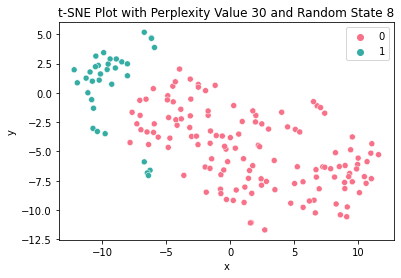

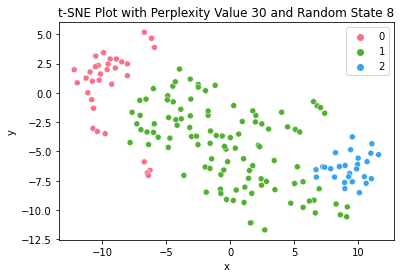

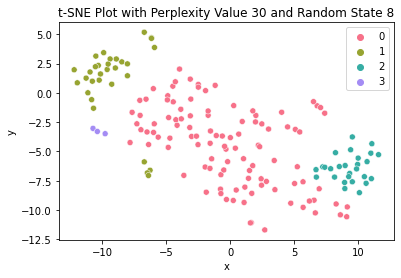

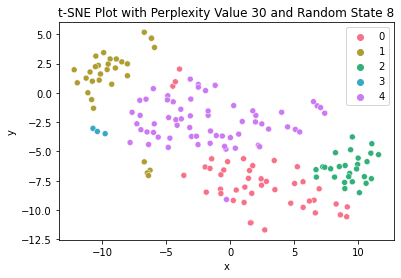

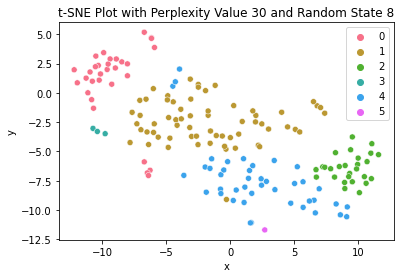

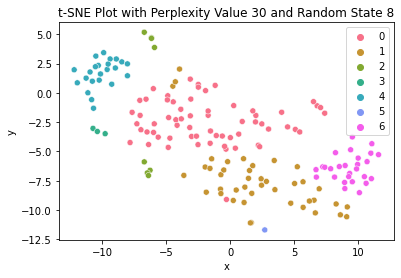

In [35]:
for k in range(2,8):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    df_combo['predicted_cluster'] = hac.fit_predict(X)
    
    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

### Final Insights

Because our overall goal for this analysis was to find *larger* groups of countries that have a set of similar characteristics, we will choose to further analyze the results produced by Ward's linkage (although all of these clustering algorithms were able to tell us something unique about the dataset). Furthermore, HAC with Ward's linkage had the most amount of agreement with the clusters that were suggested by the t-SNE plots.

Because the t-SNE plot suggests that using HAC with Ward's linkage to identify more than k=4 clusters may communcate distinctions in the dataset that aren't as important or meaningful, we will examine the clustering with k=4 clusters.



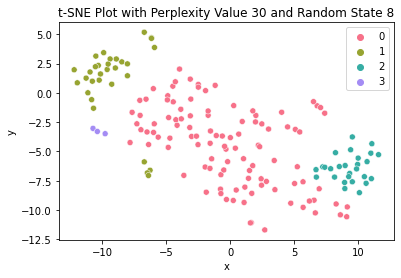

In [36]:
#Clustering from dendrogram with k clusters
hac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df_combo['predicted_cluster'] = hac.fit_predict(X)

#Map the resulting cluster labels onto our chosen t-SNE plot
sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", 4), data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

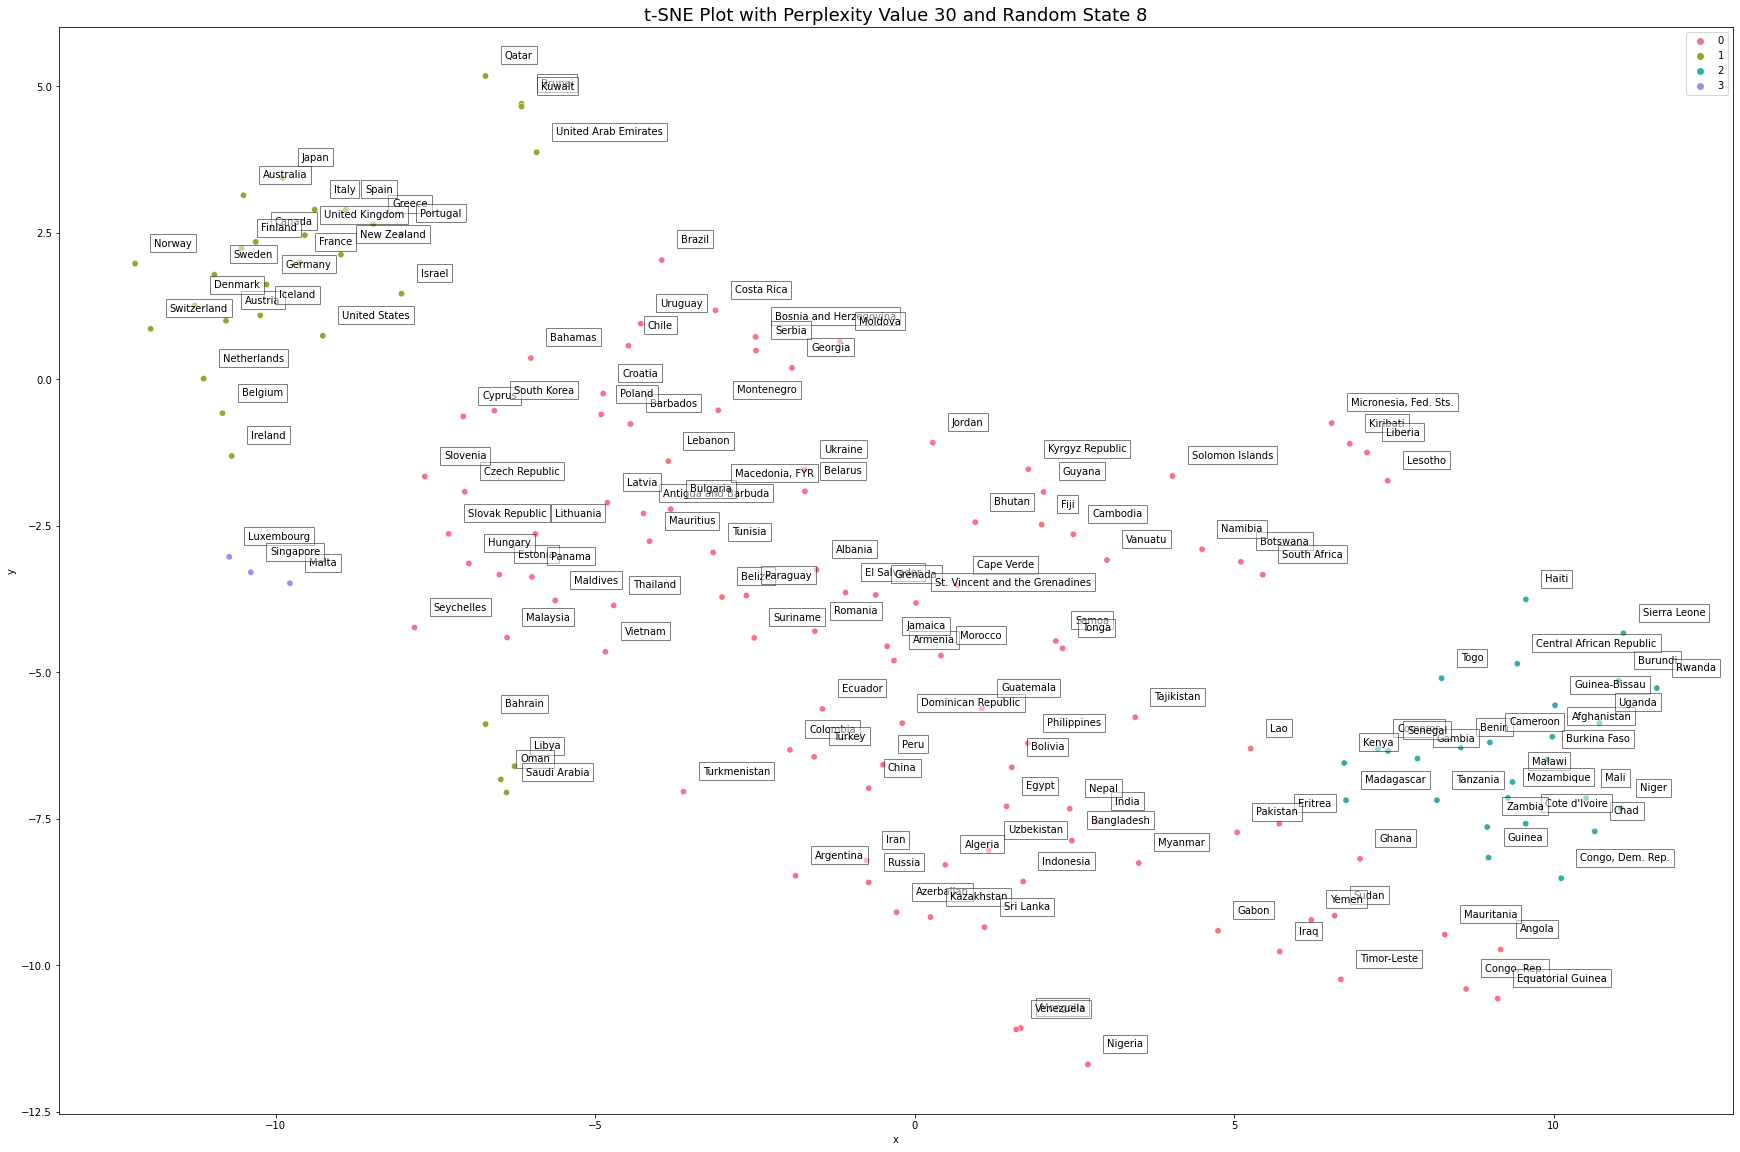

In [37]:
#Map the resulting cluster labels onto our chosen t-SNE plot
plt.figure(figsize=(30,20))
sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", 4), data=df_combo, s=40)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8), fontsize=18)
plt.legend(bbox_to_anchor=(1,1))


for i in range(df_combo.shape[0]):
 plt.text(x=df_combo.x[i]+0.3,y=df_combo.y[i]+0.3,s=df_combo.country[i], 
          fontdict=dict(color='black',size=10),
          bbox=dict(facecolor='white',alpha=0.5))

plt.show()

#### Cluster Characteristics

In [38]:
df['predicted_cluster']=df_combo['predicted_cluster']

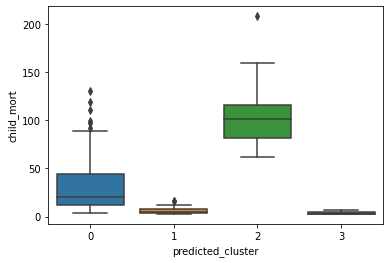

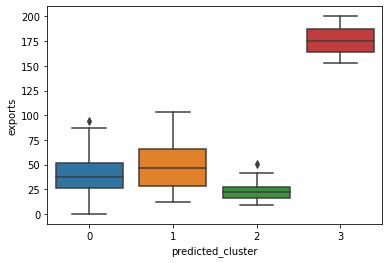

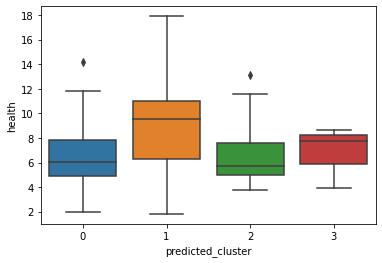

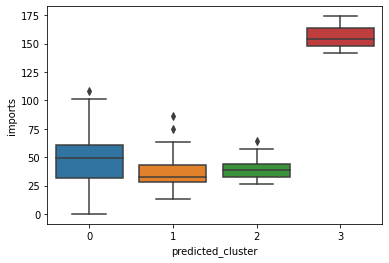

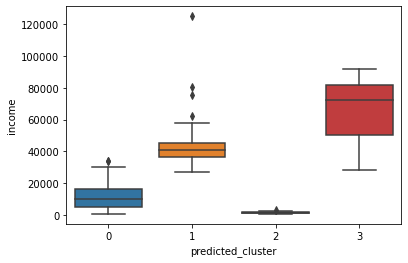

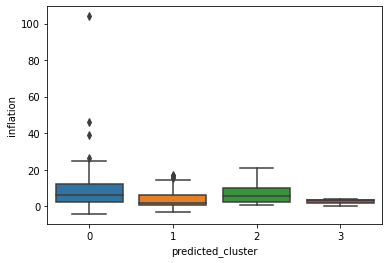

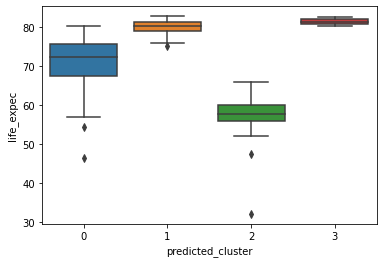

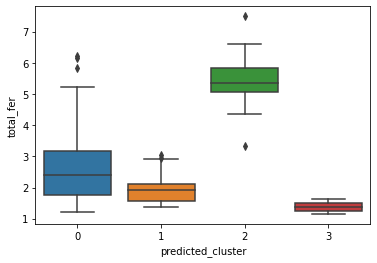

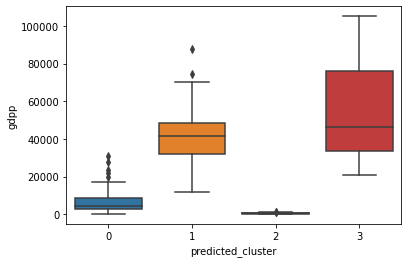

In [39]:
for col in df.columns[1:10]:
    sns.boxplot(x="predicted_cluster", y=col, data=df)
    plt.show()

#### <u> Country Cluster</u>: Low Child Mortality, High Exports and Imports, Very High Income and GDPP, Higher Fertility Rates, Very High Life Expectancy, Very Low Fertility Rate

In [40]:
df[df['predicted_cluster']==3]

country  child_mort  exports  health  imports  income  inflation  \
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
98        Malta         6.8    153.0    8.65    154.0   28300      3.830   
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   

     life_expec  total_fer    gdpp  predicted_cluster  
91         81.3       1.63  105000                  3  
98         80.3       1.36   21100                  3  
133        82.7       1.15   46600                  3

#### <u>Country Cluster</u>: Low Child Mortality, Low Exports, Higher Health, Lower Imports, Relatively High Income, High Life Expetancy, Higher GDPP, Lower Fertility 

In [41]:
df[df['predicted_cluster']==1]

country  child_mort  exports  health  imports  income  \
7               Australia         4.8     19.8    8.73     20.9   41400   
8                 Austria         4.3     51.3   11.00     47.8   43200   
11                Bahrain         8.6     69.5    4.97     50.9   41100   
15                Belgium         4.5     76.4   10.70     74.7   41100   
23                 Brunei        10.5     67.4    2.84     28.0   80600   
29                 Canada         5.6     29.1   11.30     31.0   40700   
44                Denmark         4.1     50.5   11.40     43.6   44000   
53                Finland         3.0     38.7    8.95     37.4   39800   
54                 France         4.2     26.8   11.90     28.1   36900   
58                Germany         4.2     42.3   11.60     37.1   40400   
60                 Greece         3.9     22.1   10.30     30.7   28700   
68                Iceland         2.6     53.4    9.40     43.3   38800   
73                Ireland         4.2    103.0    9.19     86.5   45700   
74                 Israel         4.6     35.0    7.63     32.9   29600   
75                  Italy         4.0     25.2    9.53     27.2   36200   
77                  Japan         3.2     15.0    9.49     13.6   35800   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
89                  Libya        16.6     65.6    3.88     42.1   29600   
110           Netherlands         4.5     72.0   11.90     63.6   45500   
111           New Zealand         6.2     30.3   10.10     28.0   32300   
114                Norway         3.2     39.7    9.48     28.5   62300   
115                  Oman        11.7     65.7    2.77     41.2   45300   
122              Portugal         3.9     29.9   11.00     37.4   27200   
123                 Qatar         9.0     62.3    1.81     23.8  125000   
128          Saudi Arabia        15.7     49.6    4.29     33.0   45400   
139                 Spain         3.8     25.5    9.54     26.8   32500   
144                Sweden         3.0     46.2    9.63     40.7   42900   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
159         United States         7.3     12.4   17.90     15.8   49400   

     inflation  life_expec  total_fer   gdpp  predicted_cluster  
7        1.160        82.0       1.93  51900                  1  
8        0.873        80.5       1.44  46900                  1  
11       7.440        76.0       2.16  20700                  1  
15       1.880        80.0       1.86  44400                  1  
23      16.700        77.1       1.84  35300                  1  
29       2.870        81.3       1.63  47400                  1  
44       3.220        79.5       1.87  58000                  1  
53       0.351        80.0       1.87  46200                  1  
54       1.050        81.4       2.03  40600                  1  
58       0.758        80.1       1.39  41800                  1  
60       0.673        80.4       1.48  26900                  1  
68       5.470        82.0       2.20  41900                  1  
73      -3.220        80.4       2.05  48700                  1  
74       1.770        81.4       3.03  30600                  1  
75       0.319        81.7       1.46  35800                  1  
77      -1.900        82.8       1.39  44500                  1  
82      11.200        78.2       2.21  38500                  1  
89      14.200        76.1       2.41  12100                  1  
110      0.848        80.7       1.79  50300                  1  
111      3.730        80.9       2.17  33700                  1  
114      5.950        81.0       1.95  87800                  1  
115     15.600        76.1       2.90  19300                  1  
122      0.643        79.8       1.39  22500                  1  
123      6.980        79.5       

#### <u>Cluster Similarity</u>

In our HAC-Ward's linkage clustering with k=4 clusters, the two clusters described above were the most similar to eachother. This is because they were joined earlier in the HAC algorithm with the clustering that had k=3 clusters.

The countries in the two clusters described above were *most dissimilar* from the two countries that we describe below. This is because the countries in the two clusters above were merged later in the HAC algorithm with the clustering that had k=1 cluster.



#### <u>Country Cluster</u>: Low Income, GDPP, Higher Life Expectancy, Lower Fertility, Low Imports, Low Child Mortality

In [42]:
df[df['predicted_cluster']==0]

country  child_mort  exports  health  imports  income  \
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5              Argentina        14.5     18.9    8.10     16.0   18700   
..                   ...         ...      ...     ...      ...     ...   
161           Uzbekistan        36.3     31.7    5.81     28.5    4240   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   

     inflation  life_expec  total_fer   gdpp  predicted_cluster  
1         4.49        76.3       1.65   4090                  0  
2        16.10        76.5       2.89   4460                  0  
3        22.40        60.1       6.16   3530                  0  
4         1.44        76.8       2.13  12200                  0  
5        20.90        75.8       2.37  10300                  0  
..         ...         ...        ...    ...                ...  
161      16.50        68.8       2.34   1380                  0  
162       2.62        63.0       3.50   2970                  0  
163      45.90        75.4       2.47  13500                  0  
164      12.10        73.1       1.95   1310                  0  
165      23.60        67.5       4.67   1310                  0  

[106 rows x 11 columns]

#### <u> Country Cluster</u>: High Child Mortality, Low Exports, Lower Imports, Very Low Income and GDPP, Higher Fertility Rates, Lower Life Expectancy, 

In [43]:
df[df['predicted_cluster']==2]

country  child_mort  exports  health  imports  income  \
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
17                      Benin       111.0    23.80    4.10     37.2    1820   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                    Burundi        93.6     8.92   11.60     39.2     764   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
32                       Chad       150.0    36.80    4.53     43.5    1930   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
66                      Haiti       208.0    15.30    6.91     64.7    1500   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
97                       Mali       137.0    22.80    4.98     35.1    1870   
106                Mozambique       101.0    31.50    5.21     46.2     918   
112                     Niger       123.0    22.20    5.16     49.1     814   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
150                      Togo        90.3    40.20    7.65     57.3    1210   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
166                    Zambia        83.1    37.00    5.89     30.9    3280   

     inflation  life_expec  total_fer  gdpp  predicted_cluster  
0        9.440        56.2       5.82   553                  2  
17       0.885        61.8       5.36   758                  2  
25       6.810        57.9       5.87   575                  2  
26      12.300        57.7       6.26   231                  2  
28       1.910        57.3       5.11  1310                  2  
31       2.010        47.5       5.21   446                  2  
32       6.390        56.5       6.59   897                  2  
36       3.870        65.9       4.75   769                  2  
37      20.800        57.5       6.54   334                  2  
40       5.390        56.3       5.27  1220                  2  
56       4.300        65.5       5.71   562                  2  
63      16.100        58.0       5.34   648                  2  
64       2.970        55.6       5.05   547                  2  
66       5.450        32.1       3.33   662                  2  
80       2.090        62.8       4.37   967                  2  
93       8.790        60.8       4.60   413                  2  
94      12.100        53.1       5.31   459                  2  
97       4.370        59.5       6.55   708                  2  
106      7.640        54.5       5.56   419                  2  
112      2.550        58.8       7.49   348                  2  
126      2.610        64.6       4.51   563                  2  
129      1.850        64.0       5.06  1000                  2  
132     17.200        55.0       5.20   399                  2  
147      9.250        59.3       5.43   702                  2  
150      1.180        58.7       4.87   488                  2  
155     10.600        56.8       6.15   595                  2  
166     14.000        52.0       5.40  1460           

#### <u>Cluster Similarity</u>

The two less wealthy country clusters that we just described above were less similar to eachother than the two clusters more wealthy country clusters. This is because the less wealthy country clusters were joined later in the HAC algorithm with the clustering that had k=2 clusters.

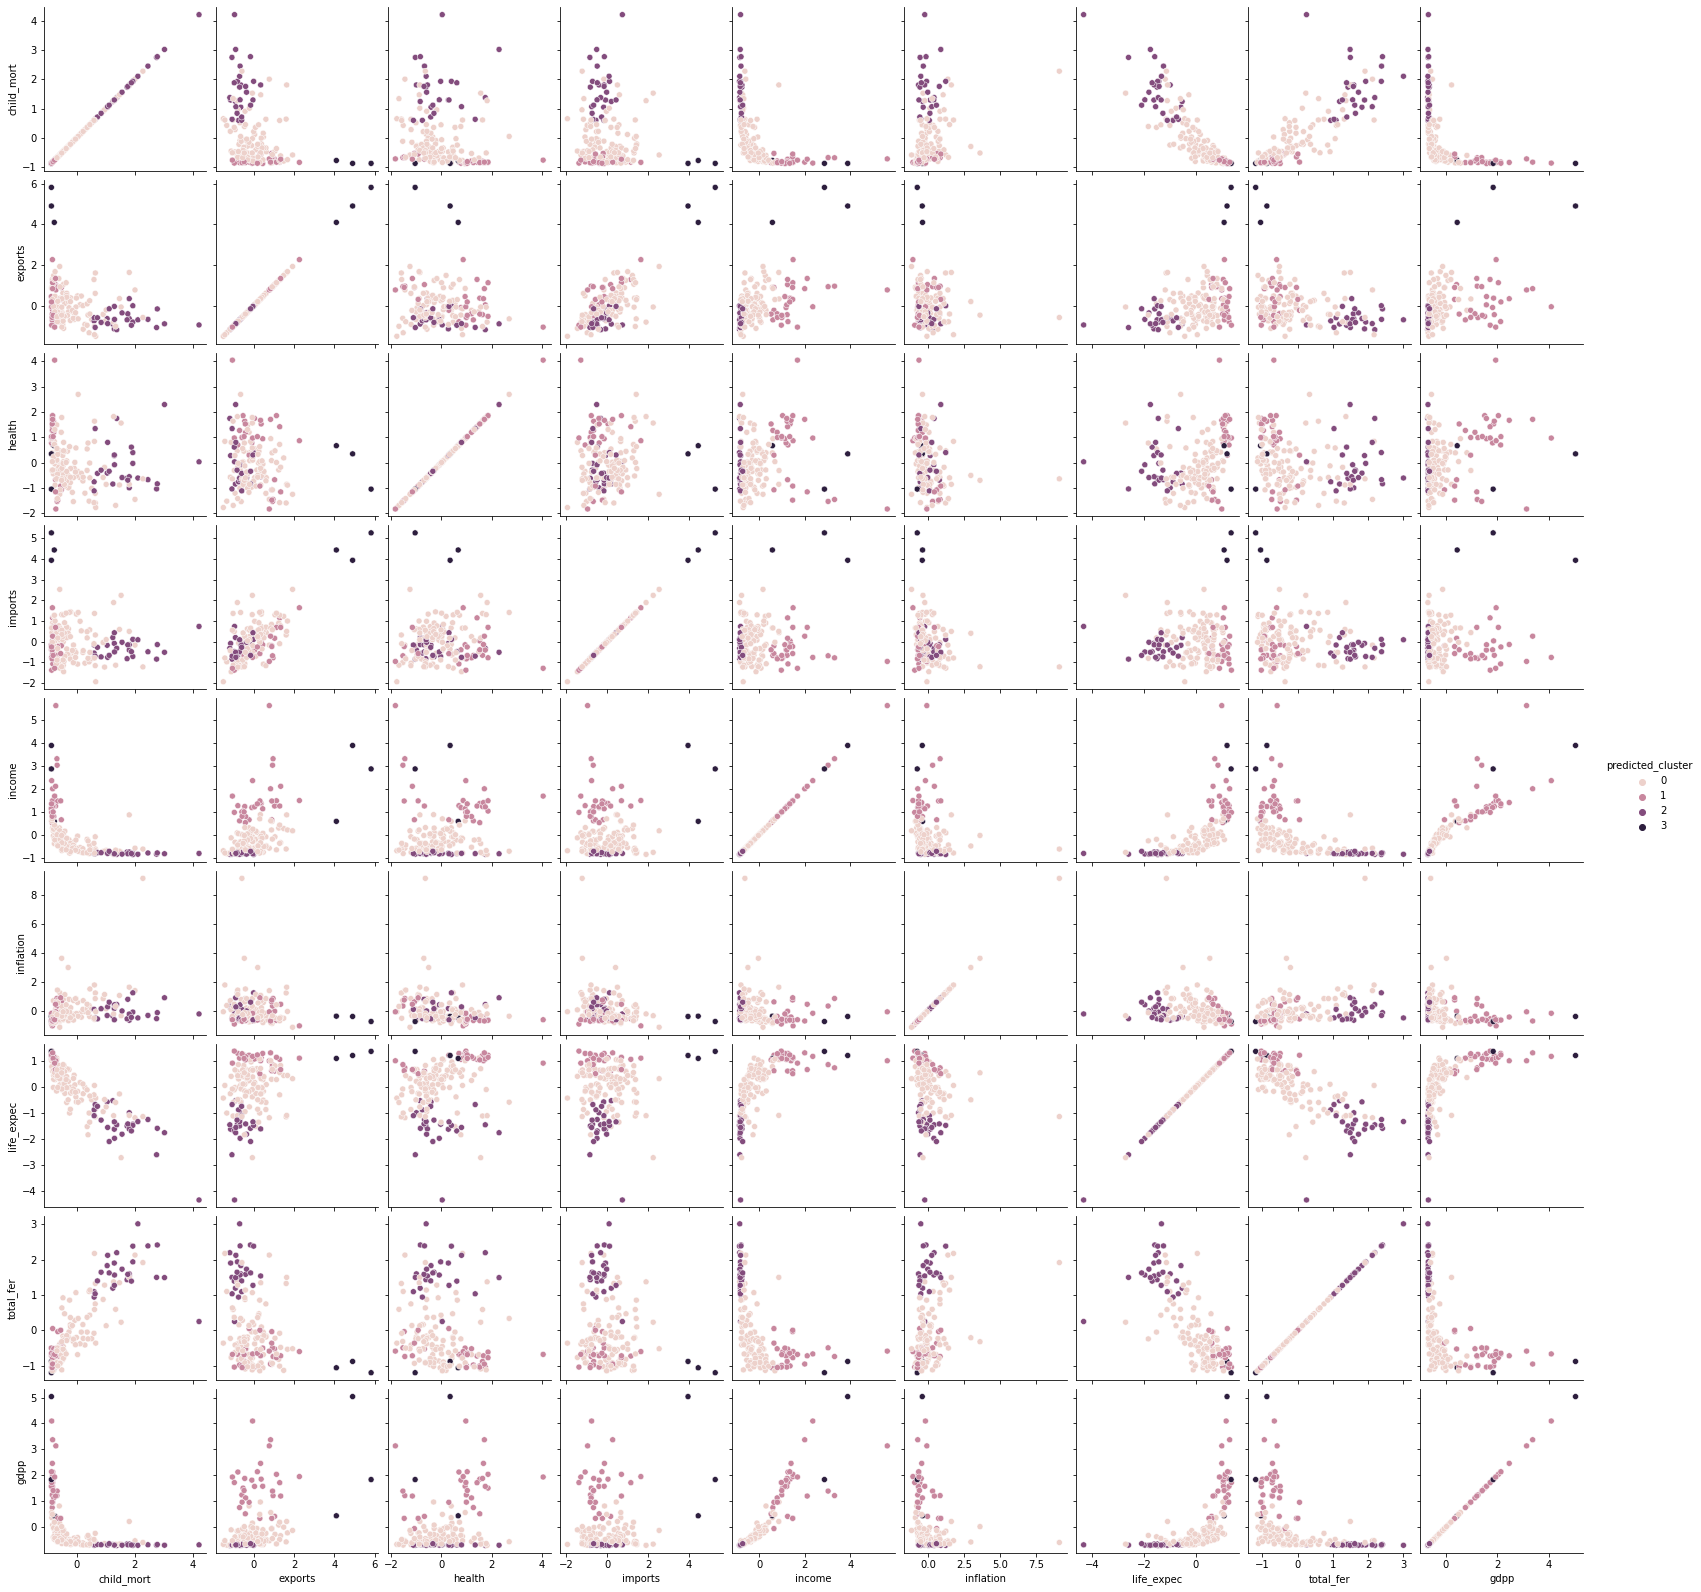

In [44]:
sns.pairplot(df_combo.drop(['x','y'], axis=1), diag_kind=None, hue='predicted_cluster')
plt.show()